In [1]:
from utils import *

C:\Users\mkrajcovic\Desktop\research-fivesecondtest\analysis\.venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Time - cognitive abilities relationship

**Load and merge data.**

In [2]:
results = pd.read_csv("../data/results.csv", index_col=0)
respondents = pd.read_csv("../data/respondents.csv", index_col=0)
respondents = respondents[respondents.status=='completed']
data = results.merge(respondents[
    ['respondent', 'interval', 'time_taken', 
     'vmt_levels', 'vmt_levels_group',
     'vmt_click_speed', 'vmt_click_speed_group', 
     'vmt_press_len', 'vmt_press_len_group',
     'pst_levels', 'pst_levels_group',
     'pst_levels_correct', 'pst_levels_correct_group',
     'pst_mistakes', 'pst_mistakes_group',
     'pst_press_speed', 
     'age', 'gender', 'education', 'web_browsing', 'web_skill']
], on=['respondent', 'interval'], how='outer')

**Calculate groups**

In [3]:
data['vmt_interval'] = ''
for index, row in data.iterrows():
    data.loc[index, 'vmt_interval'] = row.vmt_levels_group + '_' + row.interval

In [4]:
data['pst_interval'] = ''
for index, row in data.iterrows():
    data.loc[index, 'pst_interval'] = row.pst_levels_correct_group + '_' + row.interval

## VMT levels

**Mean.**

In [5]:
data[['task', 'vmt_levels_group'] + list(attrak.keys())].groupby(['task', 'vmt_levels_group']).mean()

PQ1       PQ2       PQ3       PQ4       HQ1  \
task vmt_levels_group                                                     
1    high              6.233333  5.900000  5.433333  6.133333  5.200000   
     low               5.724138  5.655172  5.275862  5.482759  5.034483   
     med               5.639344  5.442623  5.098361  5.672131  5.049180   
2    high              5.433333  5.433333  4.866667  5.166667  4.666667   
     low               4.896552  5.137931  4.655172  4.689655  4.758621   
     med               5.213115  5.245902  5.032787  5.196721  4.524590   
3    high              4.833333  5.133333  4.566667  4.933333  4.666667   
     low               5.000000  5.241379  4.965517  5.206897  4.896552   
     med               4.786885  5.147541  4.819672  5.131148  4.934426   
4    high              4.733333  5.433333  5.266667  5.233333  4.033333   
     low               5.068966  5.827586  5.551724  5.517241  4.551724   
     med               4.590164  5.409836  5.295082  4.918033  4.213115   
5    high              4.200000  4.433333  4.433333  4.133333  3.166667   
     low               3.620690  4.275862  3.896552  3.241379  3.241379   
     med               4.196721  4.426230  4.409836  4.327869  3.540984   
6    high              3.400000  4.366667  4.400000  4.166667  4.033333   
     low               2.827586  4.034483  4.517241  3.551724  3.620690   
     med               2.918033  3.688525  4.000000  3.344262  3.590164   

                            HQ2       HQ3       HQ4      ATT1      ATT2  \
task vmt_levels_group                                                     
1    high              4.833333  4.566667  4.733333  5.600000  5.733333   
     low               4.586207  4.379310  4.206897  5.172414  5.310345   
     med               4.639344  3.934426  4.163934  5.065574  5.032787   
2    high              4.433333  4.000000  4.366667  5.000000  4.833333   
     low               4.758621  4.586207  4.689655  5.034483  4.862069   
     med               4.311475  4.032787  4.032787  4.819672  4.688525   
3    high              4.700000  4.600000  4.533333  4.966667  4.933333   
     low               5.137931  4.827586  4.896552  5.275862  5.413793   
     med               4.704918  4.409836  4.721311  5.147541  4.983607   
4    high              3.633333  3.733333  3.866667  4.033333  4.666667   
     low               3.931034  3.862069  4.241379  4.724138  5.241379   
     med               3.868852  3.803279  4.081967  4.295082  4.819672   
5    high              3.133333  3.400000  4.000000  3.500000  3.733333   
     low               2.965517  3.482759  3.482759  3.448276  3.758621   
     med               3.229508  3.655738  3.934426  3.836066  4.032787   
6    high              4.166667  3.266667  3.300000  3.500000  3.833333   
     low               3.862069  3.172414  3.034483  2.758621  3.827586   
     med               3.278689  2.786885  2.950820  3.000000  3.393443   

                             PQ        HQ       ATT  
task vmt_levels_group                                
1    high              5.925000  4.833333  5.666667  
     low               5.534483  4.551724  5.241379  
     med               5.463115  4.446721  5.049180  
2    high              5.225000  4.366667  4.916667  
     low               4.844828  4.698276  4.948276  
     med               5.172131  4.225410  4.754098  
3    high              4.866667  4.625000  4.950000  
     low               5.103448  4.939655  5.344828  
     med               4.971311  4.692623  5.065574  
4    high              5.166667  3.816667  4.350000  
     low               5.491379  4.146552  4.982759  
     med               5.053279  3.991803  4.557377  
5    high              4.300000  3.425000  3.616667  
     low               3.758621  3.293103  3.603448  
     med               4.340164  3.590164  3.934426  
6    high              4.083333  3.691667  3.666667  
     low               3.732759  3.422414  3.293103  


In [6]:
data[['task', 'vmt_levels_group'] + list(open_text.keys())].groupby(['task', 'vmt_levels_group']).mean()

company   purpose  purpose_token_count  \
task vmt_levels_group                                            
1    high              0.966667  1.000000             2.500000   
     low               0.931034  0.965517             2.448276   
     med               0.967213  0.950820             2.245902   
2    high              0.866667  0.916667             3.566667   
     low               0.862069  0.758621             2.758621   
     med               0.926230  0.811475             2.540984   
3    high              0.900000  0.900000             2.766667   
     low               0.862069  0.896552             3.137931   
     med               0.877049  0.877049             3.016393   
4    high              1.000000  1.000000             2.566667   
     low               0.982759  1.000000             2.862069   
     med               0.967213  0.983607             2.540984   
5    high              0.933333  0.850000             2.600000   
     low               0.931034  0.603448             2.172414   
     med               0.934426  0.754098             2.229508   
6    high              0.916667  0.700000             3.333333   
     low               0.931034  0.724138             2.448276   
     med               0.926230  0.606557             2.508197   

                       purpose_word_count    detail  desc_eval_comp  \
task vmt_levels_group                                                 
1    high                        3.833333  0.300000        1.566667   
     low                         3.482759  0.172414        0.827586   
     med                         3.262295  0.163934        0.950820   
2    high                        5.300000  0.533333        1.166667   
     low                         3.586207  0.551724        0.724138   
     med                         3.540984  0.622951        0.852459   
3    high                        3.866667  0.133333        1.366667   
     low                         4.275862  0.241379        0.758621   
     med                         4.442623  0.172131        0.901639   
4    high                        4.300000  0.366667        1.566667   
     low                         4.655172  0.189655        0.689655   
     med                         3.573770  0.295082        0.852459   
5    high                        5.033333  0.333333        1.066667   
     low                         4.448276  0.327586        0.551724   
     med                         4.327869  0.286885        0.672131   
6    high                        5.600000  0.216667        1.266667   
     low                         4.379310  0.103448        0.620690   
     med                         4.786885  0.049180        0.770492   

                       desc_eval_elem  desc_eval_char  desc_eval_sum  \
task vmt_levels_group                                                  
1    high                    2.166667        0.700000       2.866667   
     low                     1.206897        0.620690       1.827586   
     med                     1.311475        0.508197       1.819672   
2    high                    1.966667        0.500000       2.466667   
     low                     1.448276        0.310345       1.758621   
     med                     1.442623        0.459016       1.901639   
3    high                    2.466667        0.266667       2.733333   
     low                     1.655172        0.103448       1.758621   
     med                     1.918033        0.245902       2.163934   
4    high                    2.266667        0.466667       2.733333   
     low                     1.344828        0.379310       1.724138   
     med                     1.508197        0.278689       1.786885   
5    high                    1.533333        0.733333       2.266667   
     low                     0.931034        0.413793       1.344828   
     med                     1.196721        0.426230       1.622951   
6    high                    1.800000        0.733333     

**Median.**

In [7]:
data[['task', 'vmt_levels_group'] + list(attrak.keys())].groupby(['task', 'vmt_levels_group']).median()

PQ1  PQ2  PQ3  PQ4  HQ1  HQ2  HQ3  HQ4  ATT1  ATT2  \
task vmt_levels_group                                                       
1    high              6.0  6.0  5.0  6.0  5.0  5.0  5.0  5.0   6.0   6.0   
     low               6.0  6.0  5.0  6.0  5.0  5.0  4.0  4.0   5.0   6.0   
     med               6.0  6.0  5.0  6.0  5.0  5.0  4.0  4.0   5.0   5.0   
2    high              6.0  5.5  5.0  5.0  5.0  4.0  4.0  4.0   5.0   5.0   
     low               5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0   5.0   5.0   
     med               5.0  5.0  5.0  5.0  5.0  4.0  4.0  4.0   5.0   5.0   
3    high              5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0   5.0   5.0   
     low               5.0  5.0  5.0  6.0  5.0  5.0  5.0  5.0   5.0   5.0   
     med               5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0   5.0   5.0   
4    high              5.0  6.0  5.0  5.0  4.0  4.0  4.0  4.0   4.0   5.0   
     low               5.0  6.0  6.0  6.0  4.0  4.0  4.0  4.0   5.0   5.0   
     med               4.0  5.0  5.0  5.0  4.0  4.0  4.0  4.0   4.0   5.0   
5    high              4.0  5.0  5.0  4.0  3.0  3.0  3.0  4.0   3.0   3.5   
     low               3.0  4.0  4.0  3.0  3.0  3.0  3.0  3.0   3.0   4.0   
     med               4.0  5.0  4.0  5.0  4.0  3.0  4.0  4.0   4.0   4.0   
6    high              3.0  4.5  4.5  4.0  4.0  4.0  3.0  3.0   3.0   4.0   
     low               3.0  4.0  5.0  3.0  4.0  4.0  3.0  3.0   2.0   4.0   
     med               3.0  4.0  4.0  3.0  4.0  3.0  3.0  3.0   3.0   3.0   

                          PQ    HQ   ATT  
task vmt_levels_group                     
1    high              6.000  5.00  6.00  
     low               5.500  4.50  5.50  
     med               5.500  4.50  5.00  
2    high              5.250  4.25  5.00  
     low               5.250  5.00  5.00  
     med               5.250  4.25  5.00  
3    high              5.125  4.75  5.00  
     low               5.250  5.00  5.50  
     med               5.000  4.75  5.00  
4    high              5.250  3.75  4.50  
     low               5.500  4.00  5.00  
     med               5.000  4.00  4.50  
5    high              4.500  3.25  3.50  
     low               3.500  3.00  3.50  
     med               4.500  3.75  4.00  
6    high              4.250  3.50  3.75  
     low               3.750  3.25  3.00  
     med               3.500  3.25  3.00

In [8]:
data[['task', 'vmt_levels_group'] + list(open_text.keys())].groupby(['task', 'vmt_levels_group']).median()

company  purpose  purpose_token_count  \
task vmt_levels_group                                          
1    high                  1.0      1.0                  2.0   
     low                   1.0      1.0                  2.0   
     med                   1.0      1.0                  2.0   
2    high                  1.0      1.0                  3.0   
     low                   1.0      1.0                  3.0   
     med                   1.0      1.0                  2.0   
3    high                  1.0      1.0                  2.0   
     low                   1.0      1.0                  3.0   
     med                   1.0      1.0                  3.0   
4    high                  1.0      1.0                  2.0   
     low                   1.0      1.0                  2.0   
     med                   1.0      1.0                  2.0   
5    high                  1.0      1.0                  2.0   
     low                   1.0      1.0                  2.0   
     med                   1.0      1.0                  2.0   
6    high                  1.0      1.0                  3.0   
     low                   1.0      1.0                  2.0   
     med                   1.0      0.5                  2.0   

                       purpose_word_count  detail  desc_eval_comp  \
task vmt_levels_group                                               
1    high                             2.0     0.0             1.0   
     low                              3.0     0.0             1.0   
     med                              2.0     0.0             1.0   
2    high                             4.0     1.0             1.0   
     low                              3.0     1.0             1.0   
     med                              3.0     1.0             1.0   
3    high                             3.5     0.0             1.0   
     low                              3.0     0.0             1.0   
     med                              3.0     0.0             1.0   
4    high                             3.0     0.0             1.0   
     low                              3.0     0.0             1.0   
     med                              3.0     0.0             1.0   
5    high                             4.0     0.0             1.0   
     low                              2.0     0.0             0.0   
     med                              2.0     0.0             1.0   
6    high                             5.0     0.0             1.0   
     low                              3.0     0.0             1.0   
     med                              3.0     0.0             1.0   

                       desc_eval_elem  desc_eval_char  desc_eval_sum  \
task vmt_levels_group                                                  
1    high                         2.0             0.5            3.0   
     low                          1.0             0.0            2.0   
     med                          1.0             0.0            2.0   
2    high                         2.0             0.0            3.0   
     low                          1.0             0.0            1.0   
     med                          1.0             0.0            2.0   
3    high                         2.0             0.0            3.0   
     low                          2.0             0.0            2.0   
     med                          2.0             0.0            2.0   
4    high                         2.0             0.0            3.0   
     low                          1.0             0.0            2.0   
     med                          1.0             0.0            2.0   
5    high                         1.0             1.0            2.0   
     low                          1.0             0.0            1.0   
     med                          1.0             0.0            2.0   
6    high                         2.0             0.5            3.0   
     low                          1.0             0.0            

**Std.**

In [9]:
data[['task', 'vmt_levels_group'] + list(attrak.keys())].groupby(['task', 'vmt_levels_group']).std()

PQ1       PQ2       PQ3       PQ4       HQ1  \
task vmt_levels_group                                                     
1    high              0.773854  0.884736  0.727932  1.008014  1.030567   
     low               1.360057  1.009804  1.192133  1.121883  1.322410   
     med               1.033325  0.975100  1.075561  1.028288  1.116934   
2    high              1.135124  0.897634  1.357821  1.366681  1.028334   
     low               1.472239  1.552053  1.653478  1.794902  1.503690   
     med               0.933002  0.906564  0.965526  1.122789  0.941746   
3    high              1.261727  1.332183  1.250747  1.552158  1.470007   
     low               1.362770  1.214648  0.905647  1.346406  1.144703   
     med               1.050631  1.123033  1.087937  1.189894  1.062526   
4    high              1.460593  1.250747  1.412587  1.194335  1.033352   
     low               1.412471  1.311187  1.182800  1.121883  1.020721   
     med               1.346317  1.022693  1.115710  1.201320  0.877777   
5    high              1.349329  1.222866  0.897634  1.357821  1.315251   
     low               1.760961  1.485563  1.447777  1.661651  1.327058   
     med               1.458534  1.499545  1.382956  1.660535  1.409181   
6    high              1.631585  1.542129  1.404426  1.641768  1.188547   
     low               1.627201  1.822141  1.703372  1.804483  1.049278   
     med               1.508808  1.258848  1.290994  1.515313  0.972575   

                            HQ2       HQ3       HQ4      ATT1      ATT2  \
task vmt_levels_group                                                     
1    high              1.053183  1.072648  1.436791  1.275769  1.112107   
     low               1.376259  1.424625  1.423760  1.364576  1.105294   
     med               1.252102  1.276308  1.227196  0.997812  1.015992   
2    high              1.278019  1.114172  1.188547  1.203443  1.147211   
     low               1.527256  1.637010  1.416824  1.451176  1.597412   
     med               1.103645  0.999453  1.048288  0.991769  1.073017   
3    high              1.342925  1.354431  1.407696  1.473521  1.229896   
     low               1.025536  1.255530  1.012240  1.098588  1.052794   
     med               1.022159  1.174408  1.082145  1.046201  1.008163   
4    high              1.245221  1.229896  1.407696  1.217214  1.061337   
     low               1.279817  1.407230  1.184880  1.250616  1.243703   
     med               0.956999  0.980130  1.099925  1.054265  0.922103   
5    high              1.306043  1.248447  1.114172  1.525643  1.257620   
     low               0.981353  1.271127  1.639266  1.660168  1.353703   
     med               1.334084  1.459283  1.327515  1.496444  1.471589   
6    high              1.019917  1.080655  1.149213  1.358244  1.288767   
     low               1.156477  1.582696  1.401090  1.299867  1.390503   
     med               1.066633  1.141852  1.175106  1.154701  1.144242   

                             PQ        HQ       ATT  
task vmt_levels_group                                
1    high              0.666792  0.994236  1.147211  
     low               0.900704  1.227256  1.138770  
     med               0.850044  1.058807  0.902335  
2    high              0.992102  1.012281  1.017801  
     low               1.397405  1.421109  1.490115  
     med               0.789964  0.854772  0.942616  
3    high              1.076259  1.210140  1.268654  
     low               0.985423  0.955845  0.936401  
     med               0.914123  0.962195  0.941963  
4    high              1.055228  1.070637  1.043452  
     low               1.059571  1.082567  1.129813  
     med               0.920954  0.815178  0.876063  
5    high              0.985673  1.100842  1.277682  
     low               1.397515  1.114172  1.416606  
     med               1.301468  1.293439  1.412667  
6    high              1.287093  0.927741  1.234094  
     low               1.440689  1.033163  1.228510  


In [10]:
data[['task', 'vmt_levels_group'] + list(open_text.keys())].groupby(['task', 'vmt_levels_group']).std()

company   purpose  purpose_token_count  \
task vmt_levels_group                                            
1    high              0.182574  0.000000             1.432384   
     low               0.257881  0.185695             1.351882   
     med               0.179556  0.218039             1.598497   
2    high              0.319842  0.265334             2.269488   
     low               0.350931  0.435494             1.479748   
     med               0.238678  0.389058             1.669069   
3    high              0.275431  0.305129             1.774986   
     low               0.324493  0.309934             1.903458   
     med               0.311659  0.311659             1.875205   
4    high              0.000000  0.000000             1.406471   
     low               0.092848  0.000000             1.995068   
     med               0.179556  0.128037             1.361051   
5    high              0.217086  0.351107             1.922642   
     low               0.220557  0.470169             1.983305   
     med               0.232297  0.414558             2.578071   
6    high              0.230567  0.361987             1.787569   
     low               0.257881  0.413742             1.638514   
     med               0.255540  0.377655             2.262911   

                       purpose_word_count    detail  desc_eval_comp  \
task vmt_levels_group                                                 
1    high                        2.948797  0.466092        1.135124   
     low                         2.443953  0.384426        0.804850   
     med                         3.380836  0.373288        0.864605   
2    high                        4.829150  0.507416        0.985527   
     low                         2.442441  0.488160        0.840771   
     med                         2.686843  0.480067        0.771061   
3    high                        2.968029  0.345746        0.889918   
     low                         3.336985  0.435494        0.739458   
     med                         4.283786  0.375114        0.789618   
4    high                        4.900035  0.490133        1.072648   
     low                         4.194178  0.387616        0.806379   
     med                         2.584950  0.450713        0.749134   
5    high                        4.181101  0.461133        0.944433   
     low                         5.207043  0.448726        0.736120   
     med                         7.809655  0.451470        0.676297   
6    high                        3.783813  0.386927        1.014833   
     low                         3.437335  0.309934        0.727706   
     med                         6.115867  0.218039        0.761434   

                       desc_eval_elem  desc_eval_char  desc_eval_sum  \
task vmt_levels_group                                                  
1    high                    1.315251        0.876907       1.676065   
     low                     0.977581        0.727706       1.136064   
     med                     0.885833        0.721641       1.072508   
2    high                    1.217214        0.629724       1.407696   
     low                     1.270158        0.541390       1.214648   
     med                     0.940294        0.672651       1.121085   
3    high                    1.195778        0.520830       1.337350   
     low                     1.203443        0.409253       1.154345   
     med                     1.187365        0.471018       1.306144   
4    high                    1.337350        0.628810       1.460593   
     low                     1.173391        0.561490       1.250616   
     med                     1.104882        0.635902       1.112276   
5    high                    1.357821        0.691492       1.412587   
     low                     0.997534        0.568032       1.173391   
     med                     1.194706        0.561516       1.267069   
6    high                    1.323527        0.827682     

**Plots**

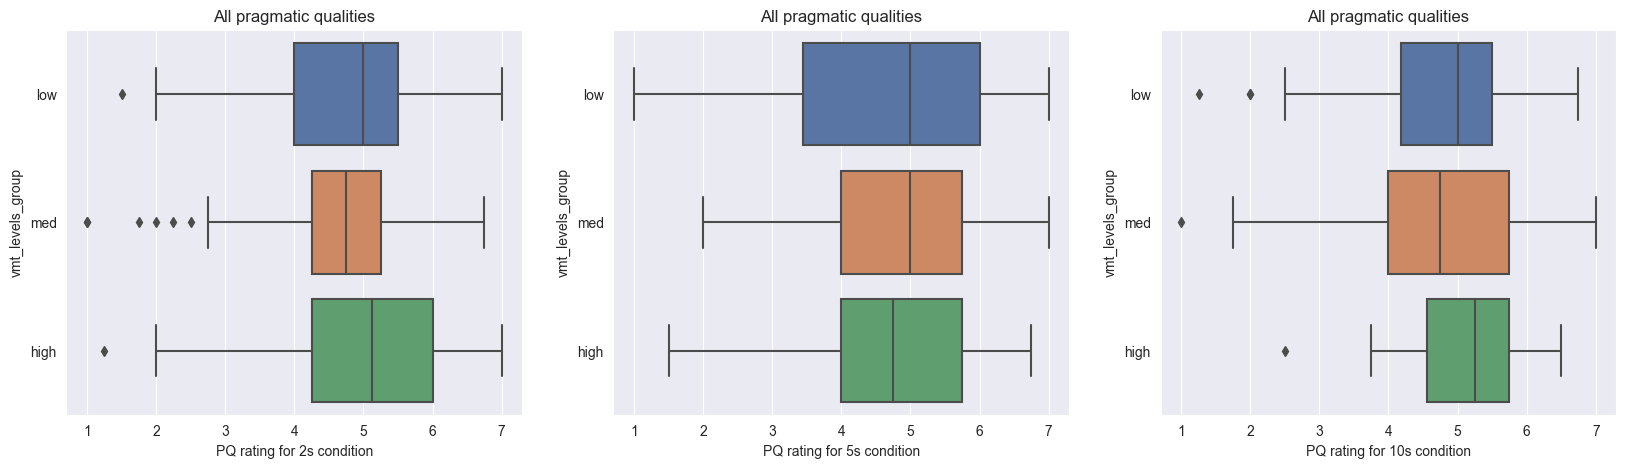

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'PQ', 'vmt_levels_group', attrak['PQ'], 'PQ rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'PQ', 'vmt_levels_group', attrak['PQ'], 'PQ rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'PQ', 'vmt_levels_group', attrak['PQ'], 'PQ rating for 10s condition', ax3, order=['low', 'med', 'high'])

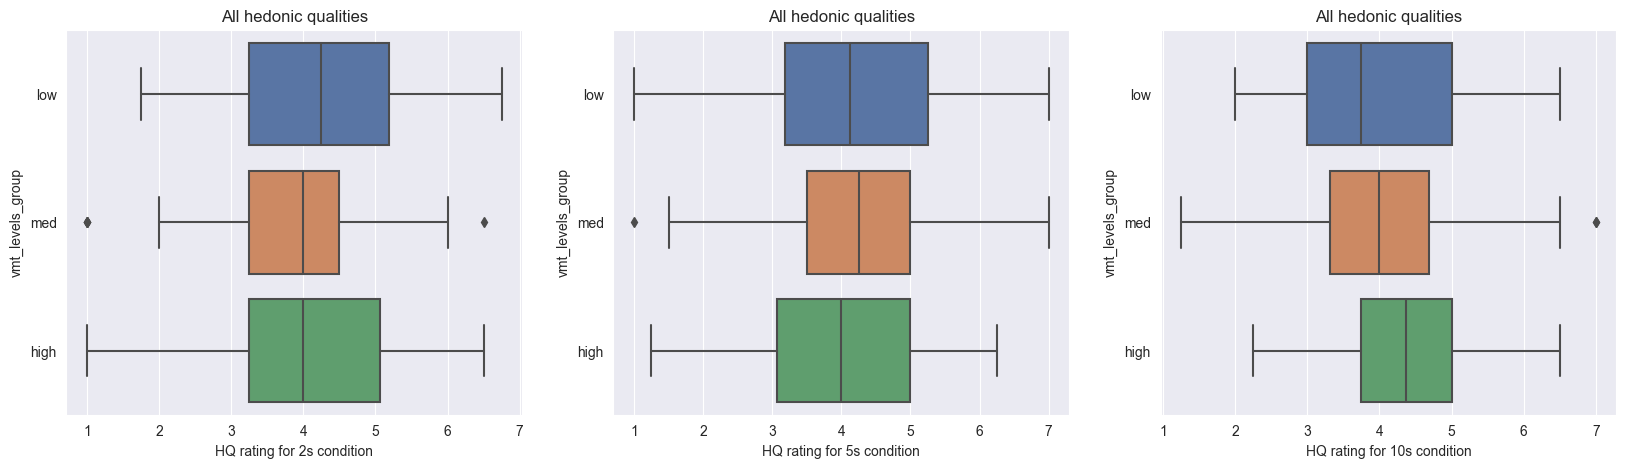

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'HQ', 'vmt_levels_group', attrak['HQ'], 'HQ rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'HQ', 'vmt_levels_group', attrak['HQ'], 'HQ rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'HQ', 'vmt_levels_group', attrak['HQ'], 'HQ rating for 10s condition', ax3, order=['low', 'med', 'high'])

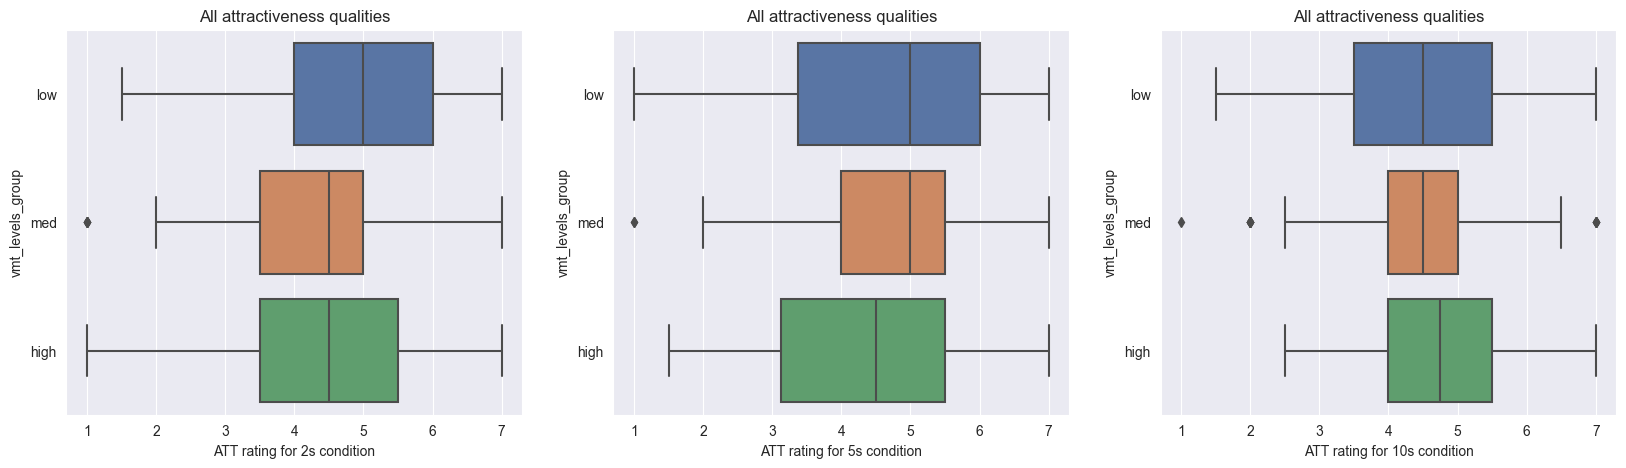

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'ATT', 'vmt_levels_group', attrak['ATT'], 'ATT rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'ATT', 'vmt_levels_group', attrak['ATT'], 'ATT rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'ATT', 'vmt_levels_group', attrak['ATT'], 'ATT rating for 10s condition', ax3, order=['low', 'med', 'high'])

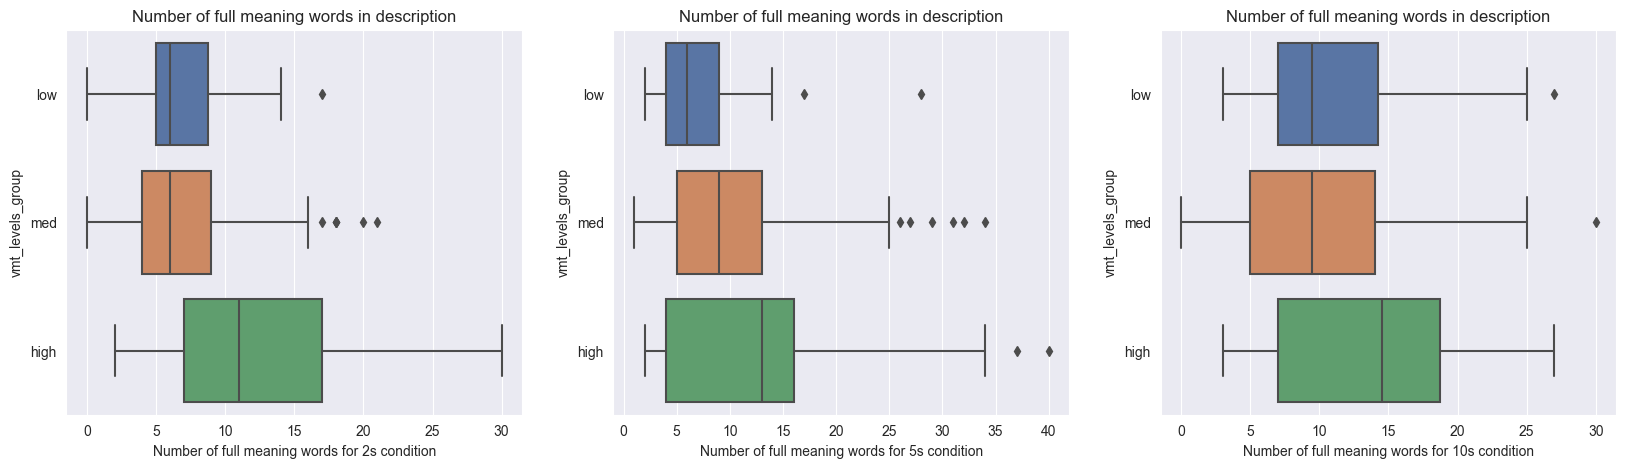

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'desc_token_count', 'vmt_levels_group', open_text['desc_token_count'], 'Number of full meaning words for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'desc_token_count', 'vmt_levels_group', open_text['desc_token_count'], 'Number of full meaning words for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'desc_token_count', 'vmt_levels_group', open_text['desc_token_count'], 'Number of full meaning words for 10s condition', ax3, order=['low', 'med', 'high'])

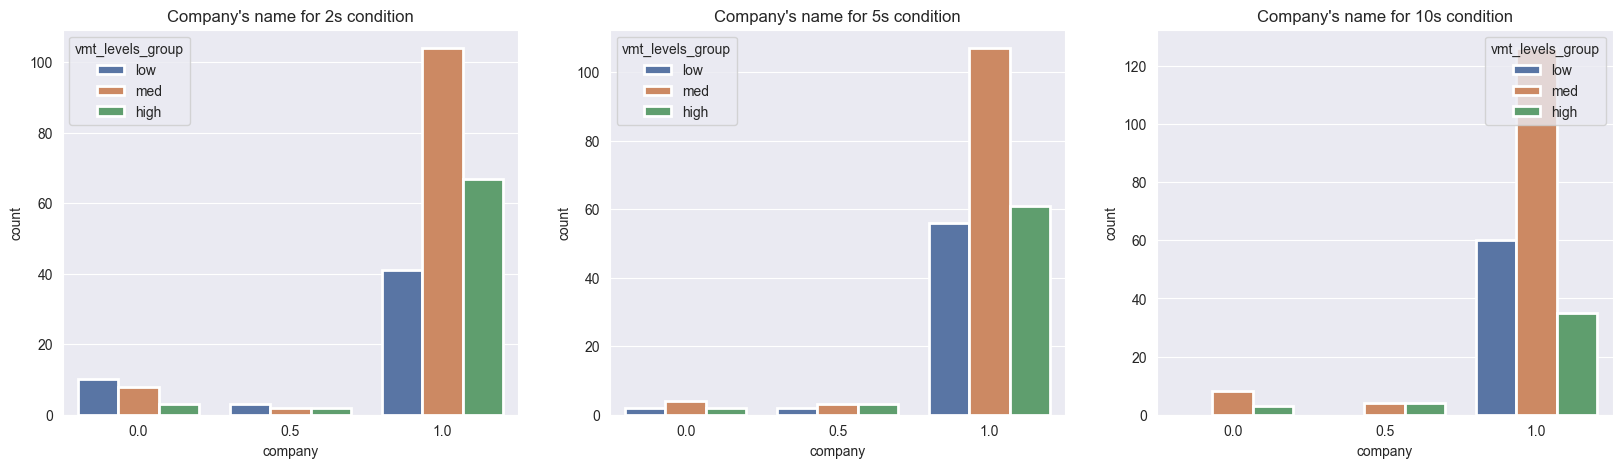

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

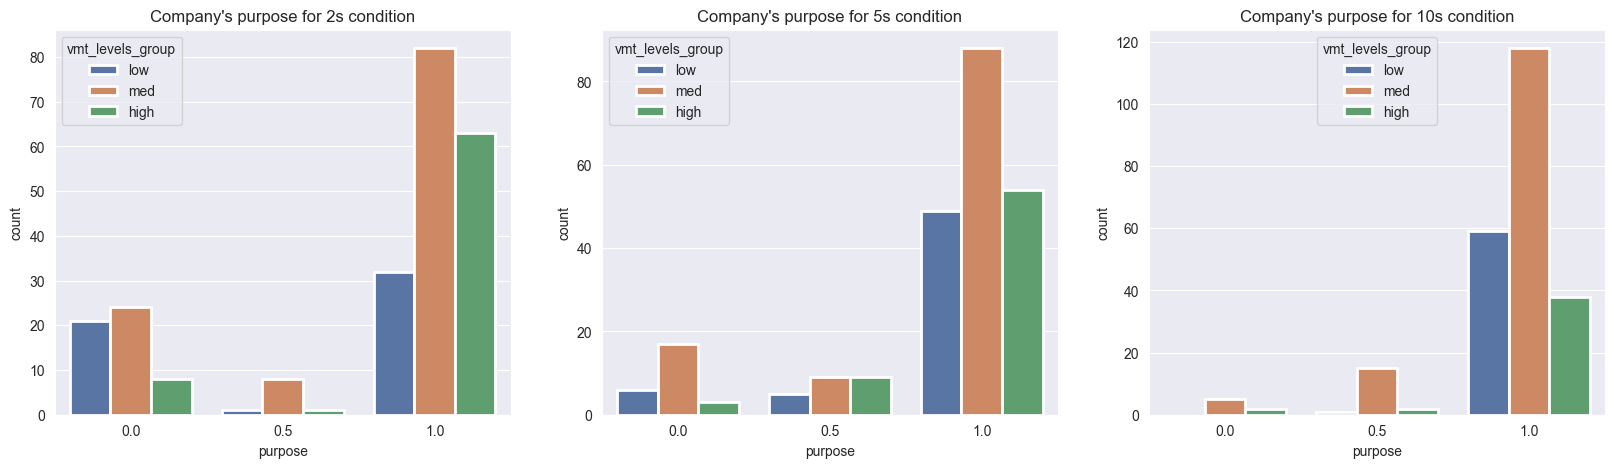

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

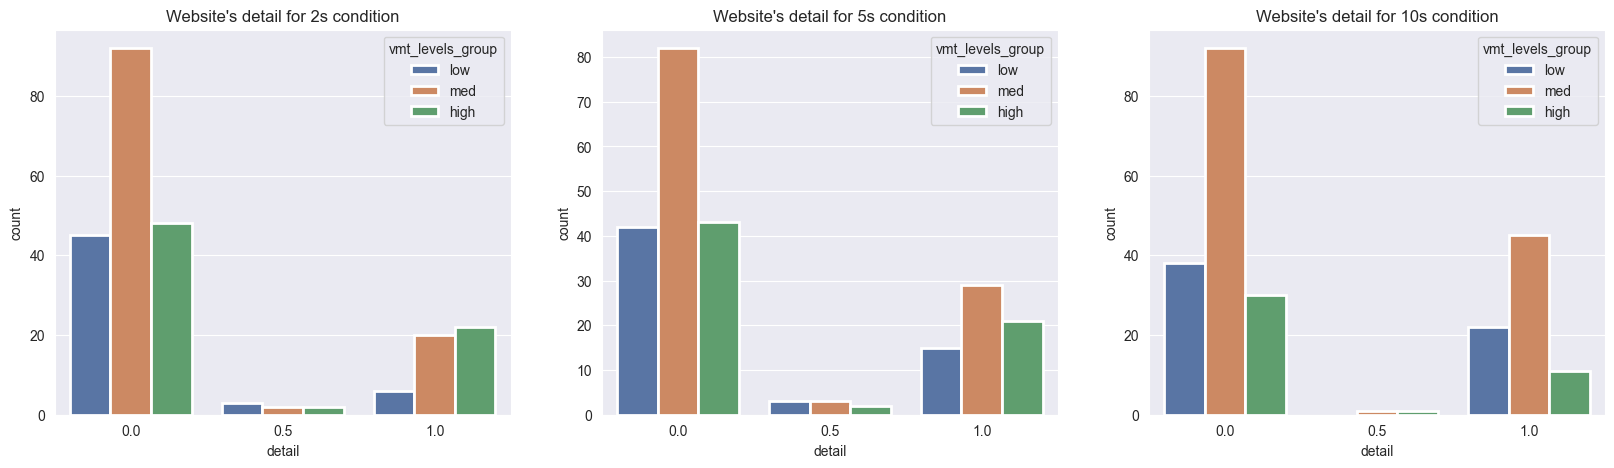

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

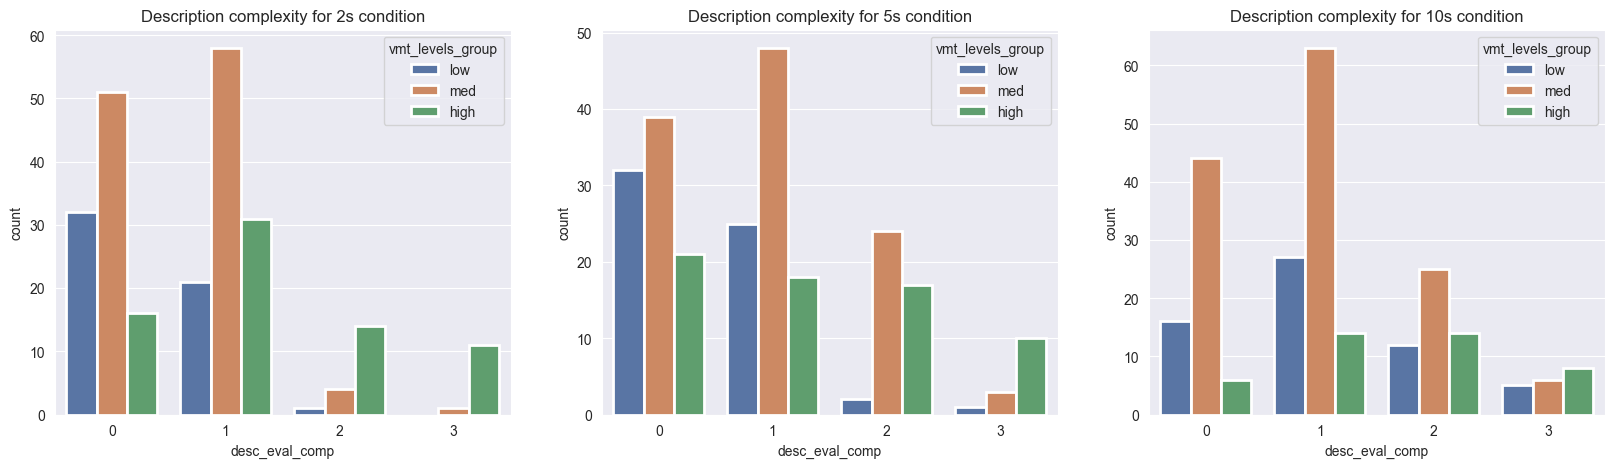

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

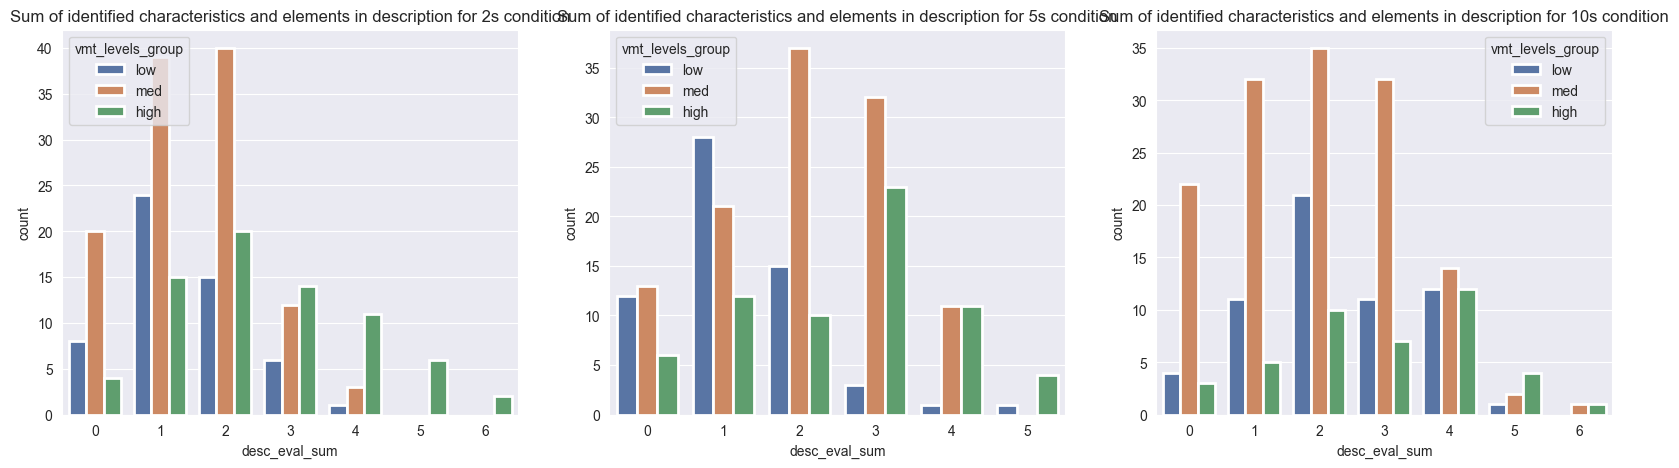

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
for col in ['company', 'purpose', 'detail', 'desc_eval_comp', 'desc_eval_sum']:
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
    my_bar_grouped(data[data.interval == '2s'], col, 'vmt_levels_group', open_text[col] + ' for 2s condition', ax=ax1, hue_order=['low', 'med', 'high'])
    my_bar_grouped(data[data.interval == '5s'], col, 'vmt_levels_group', open_text[col] + ' for 5s condition', ax=ax2, hue_order=['low', 'med', 'high'])
    my_bar_grouped(data[data.interval == '10s'], col, 'vmt_levels_group', open_text[col] + ' for 10s condition', ax=ax3, hue_order=['low', 'med', 'high'])

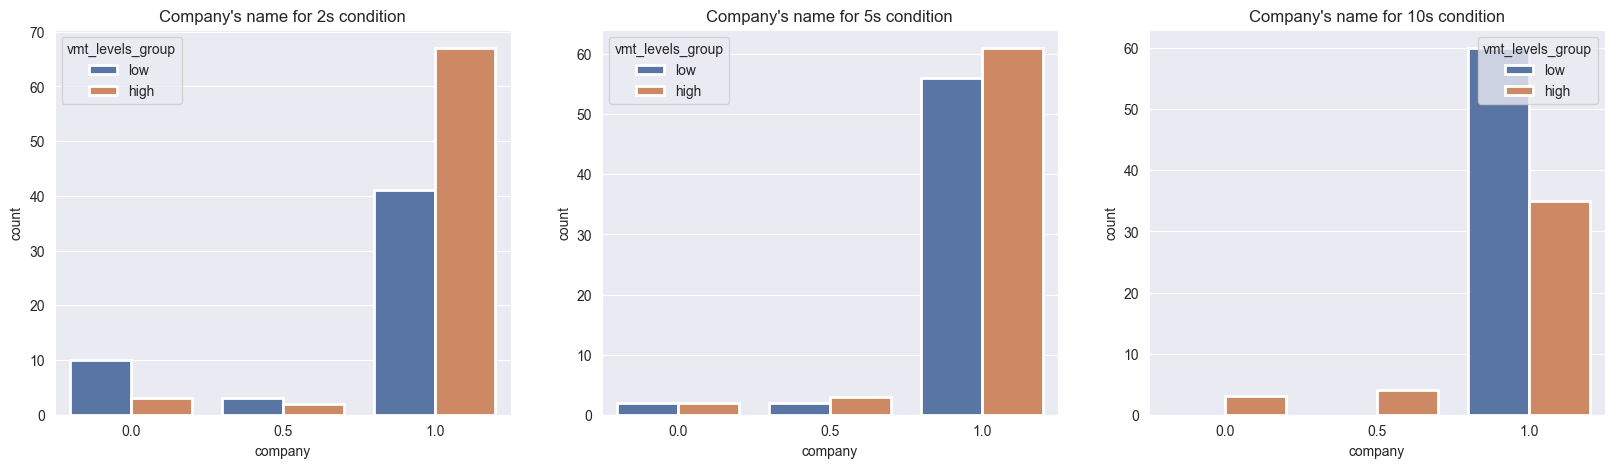

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

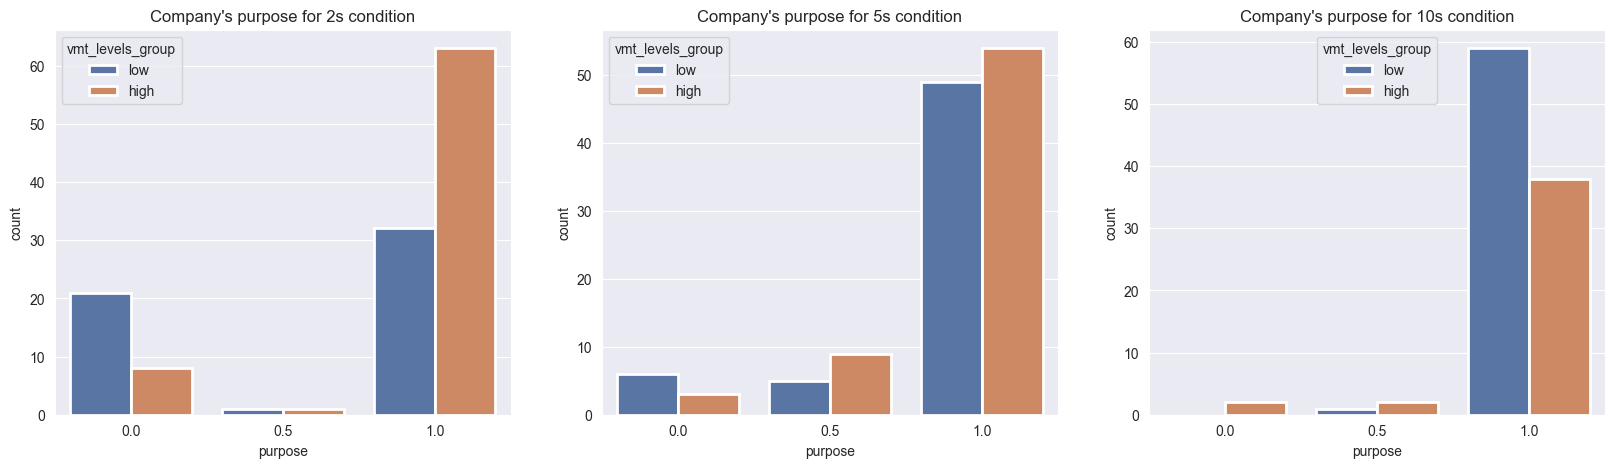

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

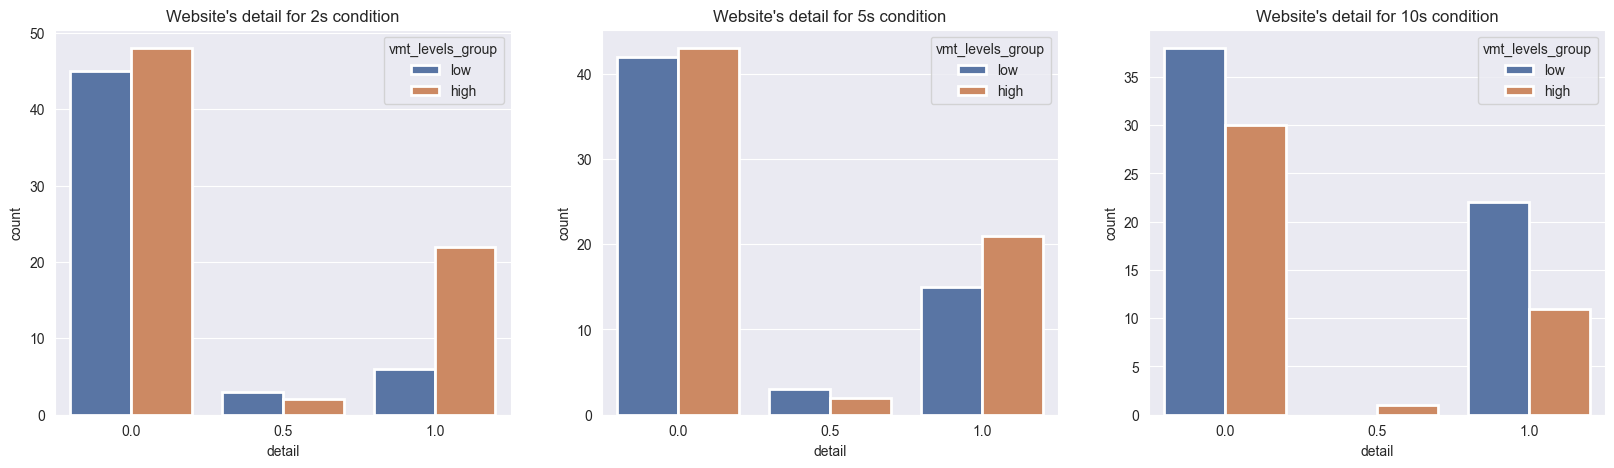

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

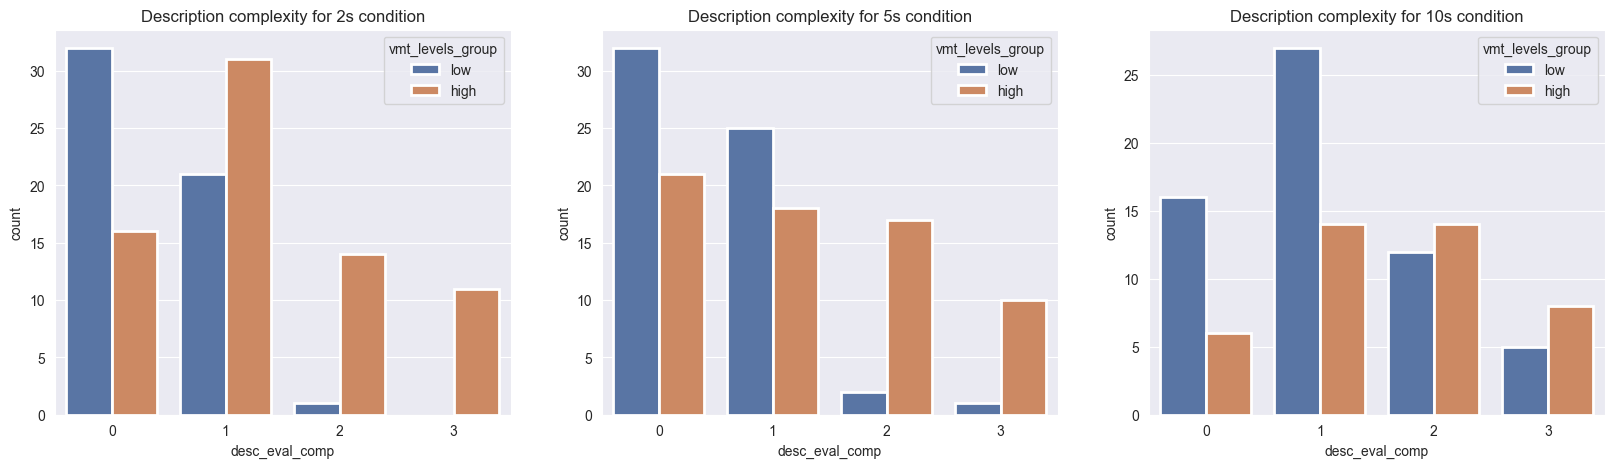

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

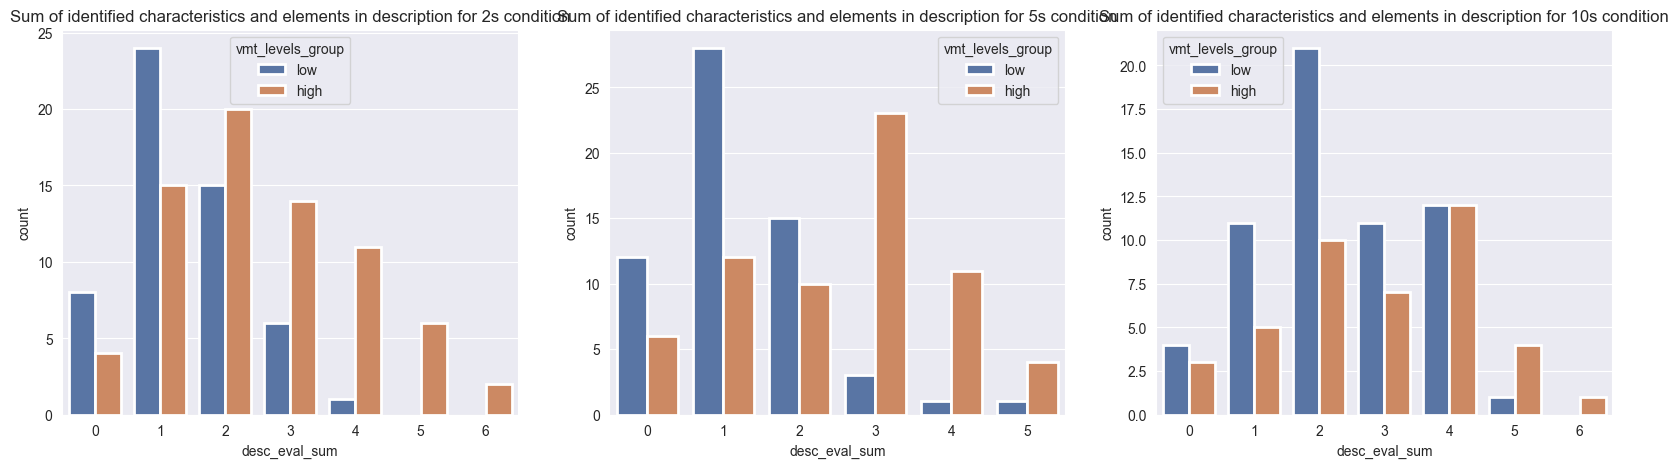

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
for col in ['company', 'purpose', 'detail', 'desc_eval_comp', 'desc_eval_sum']:
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
    my_bar_grouped(data[(data.interval == '2s') & (data.vmt_levels_group != 'med')], col, 'vmt_levels_group', open_text[col] + ' for 2s condition', ax=ax1, hue_order=['low', 'high'])
    my_bar_grouped(data[(data.interval == '5s') & (data.vmt_levels_group != 'med')], col, 'vmt_levels_group', open_text[col] + ' for 5s condition', ax=ax2, hue_order=['low', 'high'])
    my_bar_grouped(data[(data.interval == '10s') & (data.vmt_levels_group != 'med')], col, 'vmt_levels_group', open_text[col] + ' for 10s condition', ax=ax3, hue_order=['low', 'high'])

**Complexity and time interval - 2 sec vs. 5 sec.**

In [17]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data, column, 'vmt_interval', column)

PQ
KruskalResult(statistic=9.457593535557418, pvalue=0.3051750532616921)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.3051750532616921

HQ
KruskalResult(statistic=10.320665805369764, pvalue=0.24323673606613982)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.24323673606613982

ATT
KruskalResult(statistic=9.617698269027466, pvalue=0.29288981213405196)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.29288981213405196



In [18]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '10s'], column, 'vmt_interval', column)

desc_token_count
KruskalResult(statistic=53.234421998181396, pvalue=3.010486692646751e-10)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
----> pvalue: 3.010486692646751e-10

Post-hoc testing:
('high_2s', 'med_2s')9.109882159221878e-07                   1
('high_2s', 'low_2s')3.31366539522363e-06                   1
('high_2s', 'med_5s')0.027764772437330183                   1
('high_2s', 'high_5s')  0.7407693077417128                   0
('high_2s', 'low_5s')9.109882159221878e-07                   1
('med_2s', 'low_2s')  0.7407693077417128                   0
('med_2s', 'med_5s')0.002673818803718828                   1
('med_2s', 'high_5s')0.00026684394398901543                   1
('med_2s', 'low_5s')  0.6926944373184477                   0
('low_2s', 'med_5s')0.0048702881993347175                   1
('low_2s', 'high_5s')0.00038959673499160987                   1
('low_2s', 'low_5s')  0.7407693077417128                   0
('med_5s', 'high_5s') 0.18597811193757444                   0
('med_5

**Complexity and time interval - 2 sec vs. 10 sec.**

In [19]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'vmt_interval', column)

PQ
KruskalResult(statistic=8.901469052419085, pvalue=0.11305935589064556)
(72,)
(114,)
(54,)
(138,)
(42,)
(60,)
 pvalue: 0.11305935589064556

HQ
KruskalResult(statistic=6.752425330461899, pvalue=0.239713407109034)
(72,)
(114,)
(54,)
(138,)
(42,)
(60,)
 pvalue: 0.239713407109034

ATT
KruskalResult(statistic=7.076973251127963, pvalue=0.21497836872421852)
(72,)
(114,)
(54,)
(138,)
(42,)
(60,)
 pvalue: 0.21497836872421852



In [20]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'vmt_interval', column)

desc_token_count
KruskalResult(statistic=62.31920301500182, pvalue=4.02756616419794e-12)
(72,)
(114,)
(54,)
(138,)
(42,)
(60,)
----> pvalue: 4.02756616419794e-12

Post-hoc testing:
('high_2s', 'med_2s')1.4132653255016358e-06                   1
('high_2s', 'low_2s')3.31366539522363e-06                   1
('high_2s', 'med_10s') 0.02236115999852708                   1
('high_2s', 'high_10s') 0.32485860122179205                   0
('high_2s', 'low_10s') 0.32485860122179205                   0
('med_2s', 'low_2s')  0.7407693077417128                   0
('med_2s', 'med_10s')0.00045032321796888603                   1
('med_2s', 'high_10s')2.195960996494161e-06                   1
('med_2s', 'low_10s')5.1451265501096375e-05                   1
('low_2s', 'med_10s')0.000697016812809319                   1
('low_2s', 'high_10s')4.769795816391121e-06                   1
('low_2s', 'low_10s')7.032316364859305e-05                   1
('med_10s', 'high_10s')0.002405492834618754                  

**Complexity and time interval - 5 sec vs. 10 sec.**

In [21]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'vmt_interval', column)

PQ
KruskalResult(statistic=2.6499591116634122, pvalue=0.7537606790236467)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.7537606790236467

HQ
KruskalResult(statistic=6.582208678282617, pvalue=0.2536113326470353)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.2536113326470353

ATT
KruskalResult(statistic=4.342293270674867, pvalue=0.5012570885946176)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.5012570885946176



In [22]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'vmt_interval', column)

desc_token_count
KruskalResult(statistic=34.22990507913798, pvalue=2.1427810612001355e-06)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
----> pvalue: 2.1427810612001355e-06

Post-hoc testing:
('med_5s', 'high_5s') 0.20227682943617947                   0
('med_5s', 'low_5s')0.003568491497863387                   1
('med_5s', 'med_10s')  0.8564464449920333                   0
('med_5s', 'high_10s')0.012043978145572763                   1
('med_5s', 'low_10s')  0.2912225658575124                   0
('high_5s', 'low_5s') 0.00109909013533558                   1
('high_5s', 'med_10s') 0.11282758411216641                   0
('high_5s', 'high_10s') 0.20227682943617947                   0
('high_5s', 'low_10s')  0.5673015596652864                   0
('low_5s', 'med_10s')0.0007244747059142226                   1
('low_5s', 'high_10s')8.015482637486243e-06                   1
('low_5s', 'low_10s')7.064137729811668e-05                   1
('med_10s', 'high_10s')0.0036082392519281303                   

**Complexity and time - all groups**

In [23]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data, column, 'vmt_interval', column)

PQ
KruskalResult(statistic=9.457593535557418, pvalue=0.3051750532616921)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.3051750532616921

HQ
KruskalResult(statistic=10.320665805369764, pvalue=0.24323673606613982)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.24323673606613982

ATT
KruskalResult(statistic=9.617698269027466, pvalue=0.29288981213405196)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
 pvalue: 0.29288981213405196



In [24]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data, column, 'vmt_interval', column)

desc_token_count
KruskalResult(statistic=79.30970994562942, pvalue=6.731343782414587e-14)
(72,)
(114,)
(54,)
(114,)
(66,)
(60,)
(138,)
(42,)
(60,)
----> pvalue: 6.731343782414587e-14

Post-hoc testing:
('high_2s', 'med_2s')2.1863717182132508e-06                   1
('high_2s', 'low_2s')4.771678169122027e-06                   1
('high_2s', 'med_5s') 0.03028884265890565                   1
('high_2s', 'high_5s')  0.7619341451057617                   0
('high_2s', 'low_5s')2.1863717182132508e-06                   1
('high_2s', 'med_10s')0.025555611426888086                   1
('high_2s', 'high_10s')  0.3638416333684071                   0
('high_2s', 'low_10s')  0.3638416333684071                   0
('med_2s', 'low_2s')  0.7619341451057617                   0
('med_2s', 'med_5s')0.0028865914015425045                   1
('med_2s', 'high_5s')0.00025617018622945477                   1
('med_2s', 'low_5s')  0.6234249935866031                   0
('med_2s', 'med_10s')0.0005819561586059451  

**Complexity and time interval - categorical variables.**

In [25]:
my_chi(data, 'company', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
company                                                                      
0.0                7.0      5.0      5.0      0.0    13.0     4.0     12.0   
1.0               35.0     67.0     61.0     60.0    41.0    56.0    126.0   

vmt_interval  med_2s  med_5s  
company                       
0.0             10.0     7.0  
1.0            104.0   107.0  

----> pvalue: 0.0008158724194986083

stat = 26.639140429930688, df = 8
expected frequencies:
[[  3.675   6.3     5.775   5.25    4.725   5.25   12.075   9.975   9.975]
 [ 38.325  65.7    60.225  54.75   49.275  54.75  125.925 104.025 104.025]]

Post-hoc testing:
('high_10s', 'high_2s')  0.3047055341312485                   0
('high_10s', 'high_5s')   0.325884662196771                   0
('high_10s', 'low_10s')  0.0454193126976756                   1
('high_10s', 'low_2s')  0.8474312322116998                   0
('high_10s', 'low_5s')  0.3047055341312485  

In [26]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'company', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
company                                                          
0.0                7.0      5.0      5.0      0.0    13.0     4.0
1.0               35.0     67.0     61.0     60.0    41.0    56.0

----> pvalue: 0.00029499771021798807

stat = 23.305969529857393, df = 5
expected frequencies:
[[ 4.03389831  6.91525424  6.33898305  5.76271186  5.18644068  5.76271186]
 [37.96610169 65.08474576 59.66101695 54.23728814 48.81355932 54.23728814]]

Post-hoc testing:
('high_10s', 'high_2s') 0.18056624244814726                   0
('high_10s', 'high_5s') 0.18056624244814726                   0
('high_10s', 'low_10s') 0.02805310490150552                   1
('high_10s', 'low_2s') 0.37075116409261866                   0
('high_10s', 'low_5s') 0.18056624244814726                   0
('high_2s', 'high_5s')                 1.0                   0
('high_2s', 'low_10s') 0.15614786312342402                   0
('high_2s', 'low_2s') 0.060

In [27]:
my_chi(data, 'purpose', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
purpose                                                                      
0.0                4.0      9.0     12.0      1.0    22.0    11.0     20.0   
1.0               38.0     63.0     54.0     59.0    32.0    49.0    118.0   

vmt_interval  med_2s  med_5s  
purpose                       
0.0             32.0    26.0  
1.0             82.0    88.0  

----> pvalue: 1.5328198250260649e-06

stat = 41.71320343030521, df = 8
expected frequencies:
[[  7.99166667  13.7         12.55833333  11.41666667  10.275
   11.41666667  26.25833333  21.69166667  21.69166667]
 [ 34.00833333  58.3         53.44166667  48.58333333  43.725
   48.58333333 111.74166667  92.30833333  92.30833333]]

Post-hoc testing:
('high_10s', 'high_2s')  0.5077954529437648                   0
('high_10s', 'high_5s')  0.2773144784389677                   0
('high_10s', 'low_10s') 0.16645685937619864                   0
('high_10s', 'low_2s')0

In [28]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'purpose', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
purpose                                                          
0.0                4.0      9.0     12.0      1.0    22.0    11.0
1.0               38.0     63.0     54.0     59.0    32.0    49.0

----> pvalue: 1.5572044452591567e-06

stat = 34.925281385281394, df = 5
expected frequencies:
[[ 7. 12. 11. 10.  9. 10.]
 [35. 60. 55. 50. 45. 50.]]

Post-hoc testing:
('high_10s', 'high_2s')  0.8749775683490801                   0
('high_10s', 'high_5s') 0.30717911457854885                   0
('high_10s', 'low_10s')  0.1699247106132028                   0
('high_10s', 'low_2s')0.0063276772057817305                   1
('high_10s', 'low_5s') 0.30717911457854885                   0
('high_2s', 'high_5s')  0.3196836891426565                   0
('high_2s', 'low_10s') 0.04628545545694975                   1
('high_2s', 'low_2s')0.004175478031177476                   1
('high_2s', 'low_5s')  0.3196836891426565                   

In [29]:
my_chi(data, 'detail', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
detail                                                                       
0.0               31.0     50.0     45.0     38.0    48.0    45.0     93.0   
1.0               11.0     22.0     21.0     22.0     6.0    15.0     45.0   

vmt_interval  med_2s  med_5s  
detail                        
0.0             94.0    85.0  
1.0             20.0    29.0  

----> pvalue: 0.016086750497500614

stat = 18.779095121742152, df = 8
expected frequencies:
[[ 30.85833333  52.9         48.49166667  44.08333333  39.675
   44.08333333 101.39166667  83.75833333  83.75833333]
 [ 11.14166667  19.1         17.50833333  15.91666667  14.325
   15.91666667  36.60833333  30.24166667  30.24166667]]

Post-hoc testing:
('high_10s', 'high_2s')  0.8186899052455392                   0
('high_10s', 'high_5s')  0.7983037750115727                   0
('high_10s', 'low_10s')   0.646198298036273                   0
('high_10s', 'low_2s')  

In [30]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'detail', 'vmt_interval', {0: [0.5]})

vmt_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
detail                                                           
0.0               31.0     50.0     45.0     38.0    48.0    45.0
1.0               11.0     22.0     21.0     22.0     6.0    15.0

pvalue: 0.05127942129632954

stat = 11.005076651456367, df = 5
expected frequencies:
[[30.49152542 52.27118644 47.91525424 43.55932203 39.20338983 43.55932203]
 [11.50847458 19.72881356 18.08474576 16.44067797 14.79661017 16.44067797]]



In [31]:
my_chi(data, 'desc_eval_comp', 'vmt_interval', {0: [1], 2: [3]})

vmt_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_comp                                                                 
0                   20.0     47.0     39.0     43.0    53.0    57.0    107.0   
2                   22.0     25.0     27.0     17.0     1.0     3.0     31.0   

vmt_interval    med_2s  med_5s  
desc_eval_comp                  
0                109.0    87.0  
2                  5.0    27.0  

----> pvalue: 9.855135556875452e-16

stat = 88.39226625393627, df = 8
expected frequencies:
[[ 32.78333333  56.2         51.51666667  46.83333333  42.15
   46.83333333 107.71666667  88.98333333  88.98333333]
 [  9.21666667  15.8         14.48333333  13.16666667  11.85
   13.16666667  30.28333333  25.01666667  25.01666667]]

Post-hoc testing:
('high_10s', 'high_2s')0.052657308293339755                   0
('high_10s', 'high_5s') 0.16008764431699193                   0
('high_10s', 'low_10s')0.016576122770275443                   1
('high_10s

In [32]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'desc_eval_comp', 'vmt_interval', {0: [1], 2: [3]})

vmt_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_eval_comp                                                     
0                   20.0     47.0     39.0     43.0    53.0    57.0
2                   22.0     25.0     27.0     17.0     1.0     3.0

----> pvalue: 1.5022811080392672e-10

stat = 54.70334739973839, df = 5
expected frequencies:
[[30.72881356 52.6779661  48.28813559 43.89830508 39.50847458 43.89830508]
 [11.27118644 19.3220339  17.71186441 16.10169492 14.49152542 16.10169492]]

Post-hoc testing:
('high_10s', 'high_2s')  0.0658216353666747                   0
('high_10s', 'high_5s') 0.16601681632873236                   0
('high_10s', 'low_10s')0.019356305681979567                   1
('high_10s', 'low_2s')5.290343639886052e-07                   1
('high_10s', 'low_5s')1.1167538678318428e-06                   1
('high_2s', 'high_5s')  0.2825838619958413                   0
('high_2s', 'low_10s')  0.2825838619958413                   0
('high_2s', 'low_

In [33]:
my_chi(data, 'desc_eval_elem', 'vmt_interval', {1: [2], 3: [4, 5]})

vmt_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_elem                                                                 
0                    4.0     13.0      9.0     14.0    12.0    18.0     25.0   
1                   14.0     37.0     36.0     29.0    38.0    38.0     77.0   
3                   24.0     22.0     21.0     17.0     4.0     4.0     36.0   

vmt_interval    med_2s  med_5s  
desc_eval_elem                  
0                 28.0    27.0  
1                 81.0    70.0  
3                  5.0    17.0  

----> pvalue: 2.542791738943919e-11

stat = 84.50264032941377, df = 16
expected frequencies:
[[ 8.75 15.   13.75 12.5  11.25 12.5  28.75 23.75 23.75]
 [24.5  42.   38.5  35.   31.5  35.   80.5  66.5  66.5 ]
 [ 8.75 15.   13.75 12.5  11.25 12.5  28.75 23.75 23.75]]

Post-hoc testing:
('high_10s', 'high_2s') 0.01764131654476683                   1
('high_10s', 'high_5s')0.023469184156929657                   1
('high_10s', 'low_10s

In [34]:
my_chi(data, 'desc_eval_char', 'vmt_interval', {1: [2, 3]})

vmt_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_char                                                                 
0                   31.0     34.0     35.0     31.0    40.0    47.0    110.0   
1                   11.0     38.0     31.0     29.0    14.0    13.0     28.0   

vmt_interval    med_2s  med_5s  
desc_eval_char                  
0                 84.0    47.0  
1                 30.0    67.0  

----> pvalue: 3.841710479824067e-12

stat = 70.53702752639661, df = 8
expected frequencies:
[[26.775 45.9   42.075 38.25  34.425 38.25  87.975 72.675 72.675]
 [15.225 26.1   23.925 21.75  19.575 21.75  50.025 41.325 41.325]]

Post-hoc testing:
('high_10s', 'high_2s')0.013486399577505054                   1
('high_10s', 'high_5s') 0.04506505168584112                   1
('high_10s', 'low_10s')0.040024963233286234                   1
('high_10s', 'low_2s')                 1.0                   0
('high_10s', 'low_5s')  0.7793344017698696     

In [35]:
my_chi(data, 'desc_eval_sum', 'vmt_interval', {1: [2, 3], 4: [5, 6]})

vmt_interval   high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_sum                                                                 
0                   3.0      4.0      6.0      4.0     8.0    12.0     22.0   
1                  22.0     49.0     45.0     43.0    45.0    46.0     99.0   
4                  17.0     19.0     15.0     13.0     1.0     2.0     17.0   

vmt_interval   med_2s  med_5s  
desc_eval_sum                  
0                20.0    13.0  
1                91.0    90.0  
4                 3.0    11.0  

----> pvalue: 5.985023382778685e-10

stat = 76.90323917993247, df = 16
expected frequencies:
[[  5.36666667   9.2          8.43333333   7.66666667   6.9
    7.66666667  17.63333333  14.56666667  14.56666667]
 [ 30.91666667  53.          48.58333333  44.16666667  39.75
   44.16666667 101.58333333  83.91666667  83.91666667]
 [  5.71666667   9.8          8.98333333   8.16666667   7.35
    8.16666667  18.78333333  15.51666667  15.51666667]]

P

In [36]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'desc_eval_sum', 'vmt_interval', {1: [2], 3: [4, 5, 6]})

vmt_interval   high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_eval_sum                                                     
0                   3.0      4.0      6.0      4.0     8.0    12.0
1                  15.0     35.0     22.0     32.0    39.0    43.0
3                  24.0     33.0     38.0     24.0     7.0     5.0

----> pvalue: 3.4739308115544816e-09

stat = 60.09724593676207, df = 10
expected frequencies:
[[ 4.38983051  7.52542373  6.89830508  6.27118644  5.6440678   6.27118644]
 [22.06779661 37.83050847 34.6779661  31.52542373 28.37288136 31.52542373]
 [15.54237288 26.6440678  24.42372881 22.20338983 19.98305085 22.20338983]]

Post-hoc testing:
('high_10s', 'high_2s') 0.22965385550333897                   0
('high_10s', 'high_5s')  0.7994459669533615                   0
('high_10s', 'low_10s') 0.12908008281319722                   0
('high_10s', 'low_2s')5.78717499800858e-05                   1
('high_10s', 'low_5s')3.366452810697838e-06                   1
('high

In [37]:
my_chi(data, 'desc_word_count_group', 'vmt_interval')

vmt_interval           high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  \
desc_word_count_group                                                        
high                         24       33       36       25       9       8   
low                           5       14       20       13      25      28   
med                          13       25       10       22      20      24   

vmt_interval           med_10s  med_2s  med_5s  
desc_word_count_group                           
high                        46      18      40  
low                         37      53      43  
med                         55      43      31  

----> pvalue: 8.385143711851157e-11

stat = 81.64822386074715, df = 16
expected frequencies:
[[13.94166667 23.9        21.90833333 19.91666667 17.925      19.91666667
  45.80833333 37.84166667 37.84166667]
 [13.88333333 23.8        21.81666667 19.83333333 17.85       19.83333333
  45.61666667 37.68333333 37.68333333]
 [14.175      24.3        22.275      20.25 

In [38]:
my_chi(data, 'desc_token_count_group', 'vmt_interval')

vmt_interval            high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  \
desc_token_count_group                                                        
high                          23       28       34       22       4       4   
low                            6       11       20        9      20      29   
med                           13       33       12       29      30      27   

vmt_interval            med_10s  med_2s  med_5s  
desc_token_count_group                           
high                         43      15      34  
low                          37      43      35  
med                          58      56      45  

----> pvalue: 5.992888755406514e-13

stat = 93.35848708760804, df = 16
expected frequencies:
[[12.075 20.7   18.975 17.25  15.525 17.25  39.675 32.775 32.775]
 [12.25  21.    19.25  17.5   15.75  17.5   40.25  33.25  33.25 ]
 [17.675 30.3   27.775 25.25  22.725 25.25  58.075 47.975 47.975]]

Post-hoc testing:
('high_10s', 'high_2s') 0.0582963777448828

In [39]:
my_chi(data[(data.vmt_interval != 'med_2s') & (data.vmt_interval != 'med_5s') & (data.vmt_interval != 'med_10s')], 'desc_token_count_group', 'vmt_interval')

vmt_interval            high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_token_count_group                                                     
high                          23       28       34       22       4       4
low                            6       11       20        9      20      29
med                           13       33       12       29      30      27

----> pvalue: 9.69170500625794e-12

stat = 73.4105196476864, df = 10
expected frequencies:
[[13.6440678  23.38983051 21.44067797 19.49152542 17.54237288 19.49152542]
 [11.27118644 19.3220339  17.71186441 16.10169492 14.49152542 16.10169492]
 [17.08474576 29.28813559 26.84745763 24.40677966 21.96610169 24.40677966]]

Post-hoc testing:
('high_10s', 'high_2s')  0.0676990406072859                   0
('high_10s', 'high_5s')0.050795788952303716                   0
('high_10s', 'low_10s') 0.06388483764573329                   0
('high_10s', 'low_2s')5.164789945512257e-06                   1
('high_10s', 'low_5s')2.544

## PST levels

**Mean.**

In [40]:
data[['task', 'pst_levels_correct_group'] + list(attrak.keys())].groupby(['task', 'pst_levels_correct_group']).mean()

PQ1       PQ2       PQ3       PQ4  \
task pst_levels_correct_group                                           
1    high                      6.057143  5.628571  5.400000  5.914286   
     low                       5.361111  5.305556  5.000000  5.305556   
     med                       5.959184  5.816327  5.265306  5.938776   
2    high                      5.142857  5.114286  4.942857  5.085714   
     low                       5.277778  5.416667  4.805556  5.138889   
     med                       5.163265  5.265306  4.938776  5.000000   
3    high                      4.800000  5.285714  4.714286  5.085714   
     low                       4.833333  5.333333  4.944444  5.388889   
     med                       4.897959  4.959184  4.734694  4.897959   
4    high                      4.914286  5.514286  5.257143  4.971429   
     low                       4.555556  5.472222  5.138889  5.027778   
     med                       4.755102  5.551020  5.571429  5.346939   
5    high                      3.885714  4.028571  4.314286  3.942857   
     low                       3.972222  4.583333  4.250000  4.194444   
     med                       4.244898  4.510204  4.306122  3.938776   
6    high                      3.200000  3.828571  4.171429  3.657143   
     low                       2.611111  3.638889  3.944444  3.083333   
     med                       3.183673  4.244898  4.469388  3.938776   

                                    HQ1       HQ2       HQ3       HQ4  \
task pst_levels_correct_group                                           
1    high                      5.285714  4.771429  4.285714  4.485714   
     low                       4.583333  4.361111  3.972222  3.861111   
     med                       5.306122  4.836735  4.306122  4.530612   
2    high                      4.257143  4.285714  3.800000  3.971429   
     low                       4.777778  4.583333  4.361111  4.416667   
     med                       4.755102  4.469388  4.265306  4.387755   
3    high                      4.971429  4.828571  4.457143  4.628571   
     low                       5.055556  4.916667  4.805556  4.833333   
     med                       4.632653  4.714286  4.448980  4.693878   
4    high                      4.057143  3.628571  3.457143  3.885714   
     low                       4.444444  4.027778  4.027778  4.333333   
     med                       4.244898  3.816327  3.877551  4.000000   
5    high                      3.142857  3.000000  3.285714  3.628571   
     low                       3.694444  3.305556  3.916667  4.083333   
     med                       3.306122  3.122449  3.469388  3.816327   
6    high                      3.628571  3.571429  2.685714  2.885714   
     low                       3.555556  3.527778  3.138889  3.055556   
     med                       3.877551  3.775510  3.122449  3.183673   

                                   ATT1      ATT2        PQ        HQ  \
task pst_levels_correct_group                                           
1    high                      5.342857  5.457143  5.750000  4.707143   
     low                       4.777778  4.888889  5.243056  4.194444   
     med                       5.469388  5.428571  5.744898  4.744898   
2    high                      4.828571  4.657143  5.071429  4.078571   
     low                       4.944444  4.777778  5.159722  4.534722   
     med                       4.959184  4.836735  5.091837  4.469388   
3    high                      4.971429  5.085714  4.971429  4.721429   
     low                       5.388889  5.305556  5.125000  4.902778   
     med                       5.061224  4.897959  4.872449  4.622449   
4    high                      4.114286  4.657143  5.164286  3.757143   
     low                       4.583333  5.083333  5.048611  4.208333   
     med                       4.306122  4.897959  5.306122  3.984694   
5    high                      3.200000  3.657143  4.042857  3.264286   
     low           

In [41]:
data[['task', 'pst_levels_correct_group'] + list(open_text.keys())].groupby(['task', 'pst_levels_correct_group']).mean()

company   purpose  purpose_token_count  \
task pst_levels_correct_group                                            
1    high                      1.000000  0.971429             2.114286   
     low                       0.888889  0.972222             2.722222   
     med                       0.979592  0.959184             2.265306   
2    high                      0.914286  0.885714             3.085714   
     low                       0.833333  0.694444             2.638889   
     med                       0.928571  0.877551             2.836735   
3    high                      0.914286  0.985714             3.228571   
     low                       0.805556  0.791667             3.083333   
     med                       0.908163  0.887755             2.734694   
4    high                      0.971429  1.000000             2.571429   
     low                       0.958333  1.000000             2.750000   
     med                       1.000000  0.979592             2.571429   
5    high                      0.914286  0.785714             2.342857   
     low                       0.916667  0.652778             2.888889   
     med                       0.959184  0.775510             1.857143   
6    high                      0.928571  0.700000             2.800000   
     low                       0.833333  0.555556             2.305556   
     med                       0.989796  0.704082             2.918367   

                               purpose_word_count    detail  desc_eval_comp  \
task pst_levels_correct_group                                                 
1    high                                2.771429  0.200000        1.285714   
     low                                 4.305556  0.111111        0.833333   
     med                                 3.326531  0.265306        1.102041   
2    high                                4.085714  0.671429        1.000000   
     low                                 3.944444  0.638889        0.805556   
     med                                 3.959184  0.479592        0.897959   
3    high                                3.942857  0.257143        1.114286   
     low                                 4.833333  0.208333        0.750000   
     med                                 4.061224  0.102041        1.061224   
4    high                                4.428571  0.457143        1.114286   
     low                                 3.972222  0.180556        0.833333   
     med                                 3.755102  0.244898        1.020408   
5    high                                4.085714  0.214286        0.914286   
     low                                 6.305556  0.347222        0.694444   
     med                                 3.551020  0.346939        0.653061   
6    high                                4.914286  0.085714        1.028571   
     low                                 4.555556  0.111111        0.666667   
     med                                 5.122449  0.112245        0.877551   

                               desc_eval_elem  desc_eval_char  desc_eval_sum  \
task pst_levels_correct_group                                                  
1    high                            1.714286        0.800000       2.514286   
     low                             1.166667        0.388889       1.555556   
     med                             1.591837        0.571429       2.163265   
2    high                            1.714286        0.428571       2.142857   
     low                             1.472222        0.250000       1.722222   
     med                             1.551020        0.571429       2.122449   
3    high                            2.257143        0.200000       2.457143   
     low                             1.638889        0.111111       1.750000   
     med                             2.061224        0.306122       2.367347   
4    high                            1.742857        0.371429       2.114286   
     low  

**Median.**

In [42]:
data[['task', 'pst_levels_correct_group'] + list(attrak.keys())].groupby(['task', 'pst_levels_correct_group']).median()

PQ1  PQ2  PQ3  PQ4  HQ1  HQ2  HQ3  HQ4  ATT1  \
task pst_levels_correct_group                                                 
1    high                      6.0  6.0  5.0  6.0  5.0  5.0  4.0  5.0   5.0   
     low                       6.0  5.5  5.0  5.0  5.0  4.5  4.0  4.0   5.0   
     med                       6.0  6.0  5.0  6.0  5.0  5.0  4.0  5.0   6.0   
2    high                      5.0  5.0  5.0  5.0  4.0  4.0  4.0  4.0   5.0   
     low                       5.0  6.0  5.0  5.0  5.0  4.0  4.0  4.0   5.0   
     med                       5.0  5.0  5.0  5.0  5.0  4.0  4.0  4.0   5.0   
3    high                      5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0   5.0   
     low                       5.0  5.0  5.0  5.5  5.0  5.0  5.0  5.0   5.0   
     med                       5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0   5.0   
4    high                      5.0  6.0  5.0  5.0  4.0  4.0  3.0  4.0   4.0   
     low                       4.0  6.0  5.0  5.0  4.0  4.0  4.0  4.0   4.0   
     med                       5.0  6.0  6.0  5.0  4.0  4.0  4.0  4.0   4.0   
5    high                      4.0  4.0  4.0  4.0  3.0  3.0  3.0  4.0   3.0   
     low                       4.0  4.0  4.0  4.0  4.0  3.0  4.0  4.0   4.0   
     med                       5.0  5.0  4.0  4.0  3.0  3.0  3.0  4.0   4.0   
6    high                      3.0  4.0  4.0  3.0  4.0  4.0  3.0  3.0   3.0   
     low                       2.0  4.0  4.0  3.0  4.0  4.0  3.0  3.0   3.0   
     med                       3.0  4.0  5.0  4.0  4.0  4.0  3.0  3.0   3.0   

                               ATT2     PQ     HQ  ATT  
task pst_levels_correct_group                           
1    high                       6.0  5.750  4.750  5.5  
     low                        5.0  5.250  4.250  5.0  
     med                        6.0  5.750  4.750  5.5  
2    high                       5.0  5.000  4.000  5.0  
     low                        5.0  5.375  4.500  5.0  
     med                        5.0  5.250  4.250  5.0  
3    high                       5.0  5.000  4.750  5.0  
     low                        5.0  5.000  5.000  5.5  
     med                        5.0  5.250  4.500  5.0  
4    high                       4.0  5.250  3.750  4.5  
     low                        5.0  5.000  4.125  5.0  
     med                        5.0  5.250  4.000  4.5  
5    high                       4.0  4.250  3.000  3.0  
     low                        4.0  4.125  3.875  4.0  
     med                        4.0  4.250  3.250  4.0  
6    high                       4.0  3.750  3.250  3.0  
     low                        3.5  3.375  3.250  3.0  
     med                        4.0  4.000  3.500  3.5

In [43]:
data[['task', 'pst_levels_correct_group'] + list(open_text.keys())].groupby(['task', 'pst_levels_correct_group']).median()

company  purpose  purpose_token_count  \
task pst_levels_correct_group                                          
1    high                          1.0      1.0                  2.0   
     low                           1.0      1.0                  2.0   
     med                           1.0      1.0                  2.0   
2    high                          1.0      1.0                  3.0   
     low                           1.0      1.0                  2.0   
     med                           1.0      1.0                  3.0   
3    high                          1.0      1.0                  3.0   
     low                           1.0      1.0                  3.0   
     med                           1.0      1.0                  2.0   
4    high                          1.0      1.0                  2.0   
     low                           1.0      1.0                  2.0   
     med                           1.0      1.0                  2.0   
5    high                          1.0      1.0                  2.0   
     low                           1.0      1.0                  2.0   
     med                           1.0      1.0                  2.0   
6    high                          1.0      1.0                  2.0   
     low                           1.0      0.5                  2.0   
     med                           1.0      1.0                  2.0   

                               purpose_word_count  detail  desc_eval_comp  \
task pst_levels_correct_group                                               
1    high                                     2.0     0.0             1.0   
     low                                      3.0     0.0             1.0   
     med                                      2.0     0.0             1.0   
2    high                                     3.0     1.0             1.0   
     low                                      3.0     1.0             1.0   
     med                                      3.0     0.0             1.0   
3    high                                     4.0     0.0             1.0   
     low                                      3.0     0.0             1.0   
     med                                      3.0     0.0             1.0   
4    high                                     3.0     0.0             1.0   
     low                                      3.0     0.0             1.0   
     med                                      3.0     0.0             1.0   
5    high                                     3.0     0.0             1.0   
     low                                      3.0     0.0             1.0   
     med                                      2.0     0.0             1.0   
6    high                                     4.0     0.0             1.0   
     low                                      3.0     0.0             1.0   
     med                                      3.0     0.0             1.0   

                               desc_eval_elem  desc_eval_char  desc_eval_sum  \
task pst_levels_correct_group                                                  
1    high                                 1.0             1.0            2.0   
     low                                  1.0             0.0            1.0   
     med                                  1.0             0.0            2.0   
2    high                                 2.0             0.0            2.0   
     low                                  1.0             0.0            2.0   
     med                                  1.0             0.0            2.0   
3    high                                 2.0             0.0            2.0   
     low                                  2.0             0.0            2.0   
     med                                  2.0             0.0            2.0   
4    high                                 1.0             0.0            2.0   
     low                                  1.0             0.0            2.0   
     med 

**Std.**

In [44]:
data[['task', 'pst_levels_correct_group'] + list(attrak.keys())].groupby(['task', 'pst_levels_correct_group']).std()

PQ1       PQ2       PQ3       PQ4  \
task pst_levels_correct_group                                           
1    high                      0.905631  0.972738  1.034692  1.010865   
     low                       1.245627  1.064208  1.041976  1.166667   
     med                       0.999149  0.858134  1.016028  0.944461   
2    high                      1.309307  1.131668  1.258918  1.314432   
     low                       1.233140  1.227657  1.348426  1.514742   
     med                       0.943110  0.952530  1.214636  1.338532   
3    high                      0.994100  1.016668  1.100038  1.314432   
     low                       1.207122  0.985611  0.954521  0.934353   
     med                       1.294940  1.413612  1.186302  1.530862   
4    high                      1.379928  0.981338  1.421326  1.294461   
     low                       1.229273  1.298045  1.125110  1.081959   
     med                       1.521110  1.191309  1.080123  1.199844   
5    high                      1.586180  1.580873  1.323352  1.661729   
     low                       1.594385  1.360147  1.360147  1.670234   
     med                       1.422009  1.324803  1.278086  1.625425   
6    high                      1.568064  1.424279  1.382362  1.661729   
     low                       1.399546  1.570310  1.529602  1.592393   
     med                       1.666752  1.465302  1.385972  1.599585   

                                    HQ1       HQ2       HQ3       HQ4  \
task pst_levels_correct_group                                           
1    high                      0.925820  1.086974  1.226459  1.245496   
     low                       1.180194  1.245627  1.383290  1.125110   
     med                       1.158377  1.296581  1.261680  1.487476   
2    high                      0.980482  1.045197  0.994100  0.857003   
     low                       1.197882  1.250714  1.312637  1.338976   
     med                       1.109253  1.415716  1.271081  1.288027   
3    high                      1.150082  1.042782  1.171797  1.113704   
     low                       1.119807  1.024695  1.214659  1.028175   
     med                       1.253227  1.241639  1.308008  1.278086   
4    high                      0.725293  0.972738  1.120474  1.278129   
     low                       0.998411  1.182881  1.158475  0.925820   
     med                       1.071032  1.148794  1.129761  1.307032   
5    high                      1.478132  1.414214  1.466718  1.415995   
     low                       1.348426  1.260826  1.480830  1.500000   
     med                       1.278086  1.111168  1.138384  1.219178   
6    high                      1.190297  1.219588  1.254906  1.254906   
     low                       1.026630  0.909823  1.396992  1.240839   
     med                       0.971096  1.229250  1.129761  1.201968   

                                   ATT1      ATT2        PQ        HQ  \
task pst_levels_correct_group                                           
1    high                      1.136115  1.066684  0.797515  0.946133   
     low                       1.072010  0.949520  0.856667  1.021398   
     med                       1.209374  1.154701  0.786424  1.180891   
2    high                      1.070616  1.109925  1.128787  0.768812   
     low                       1.263656  1.375523  1.085872  1.198441   
     med                       1.171879  1.213585  0.896599  1.115274   
3    high                      1.248192  0.950895  0.848380  0.960184   
     low                       1.049565  0.950772  0.752377  0.980666   
     med                       1.197361  1.245741  1.173850  1.105293   
4    high                      1.157366  0.802308  0.952826  0.819087   
     low                       0.937321  1.180194  0.907940  0.926784   
     med                       1.294284  1.103874  1.092428  1.031292   
5    high                      1.491150  1.454058  1.330477  1.320014   
     low           

In [45]:
data[['task', 'pst_levels_correct_group'] + list(open_text.keys())].groupby(['task', 'pst_levels_correct_group']).std()

company   purpose  purpose_token_count  \
task pst_levels_correct_group                                            
1    high                      0.000000  0.169031             1.105373   
     low                       0.318728  0.166667             1.950987   
     med                       0.142857  0.199915             1.319336   
2    high                      0.256839  0.299158             1.704172   
     low                       0.358569  0.467177             1.899666   
     med                       0.250000  0.331201             1.885768   
3    high                      0.256839  0.084515             1.646488   
     low                       0.364060  0.403113             1.962142   
     med                       0.282722  0.310666             1.901485   
4    high                      0.169031  0.000000             1.440705   
     low                       0.184197  0.000000             1.826394   
     med                       0.000000  0.142857             1.399405   
5    high                      0.256839  0.407390             1.454058   
     low                       0.280306  0.460116             3.591878   
     med                       0.138321  0.396091             1.241639   
6    high                      0.214985  0.367823             1.694281   
     low                       0.377964  0.410188             2.108750   
     med                       0.071429  0.366833             2.187433   

                               purpose_word_count    detail  desc_eval_comp  \
task pst_levels_correct_group                                                 
1    high                                2.030441  0.405840        1.072968   
     low                                 4.097522  0.318728        0.878310   
     med                                 2.664487  0.446071        0.918443   
2    high                                2.821883  0.468773        0.907485   
     low                                 3.593203  0.472246        0.920231   
     med                                 3.599532  0.499575        0.770414   
3    high                                2.448804  0.443440        0.758149   
     low                                 4.266146  0.403113        0.691789   
     med                                 4.125167  0.305839        0.944461   
4    high                                4.742088  0.505433        0.900047   
     low                                 3.434997  0.380841        0.736788   
     med                                 2.989779  0.422326        1.030570   
5    high                                3.128347  0.407390        0.886879   
     low                                10.563602  0.460116        0.709907   
     med                                 3.323284  0.469974        0.751416   
6    high                                3.689185  0.284029        1.042782   
     low                                 4.391189  0.318728        0.717137   
     med                                 6.240435  0.293423        0.780829   

                               desc_eval_elem  desc_eval_char  desc_eval_sum  \
task pst_levels_correct_group                                                  
1    high                            1.072968        0.964060       1.462702   
     low                             0.941124        0.598941       1.132493   
     med                             1.171153        0.677003       1.264037   
2    high                            1.202239        0.698137       1.263582   
     low                             1.133543        0.439155       1.161553   
     med                             1.042058        0.677003       1.268737   
3    high                            1.171797        0.472789       1.313792   
     low                             1.099423        0.318728       1.155731   
     med                             1.297564        0.547878       1.364641   
4    high                            1.196634        0.645606       1.300937   
     low  

**Plots**

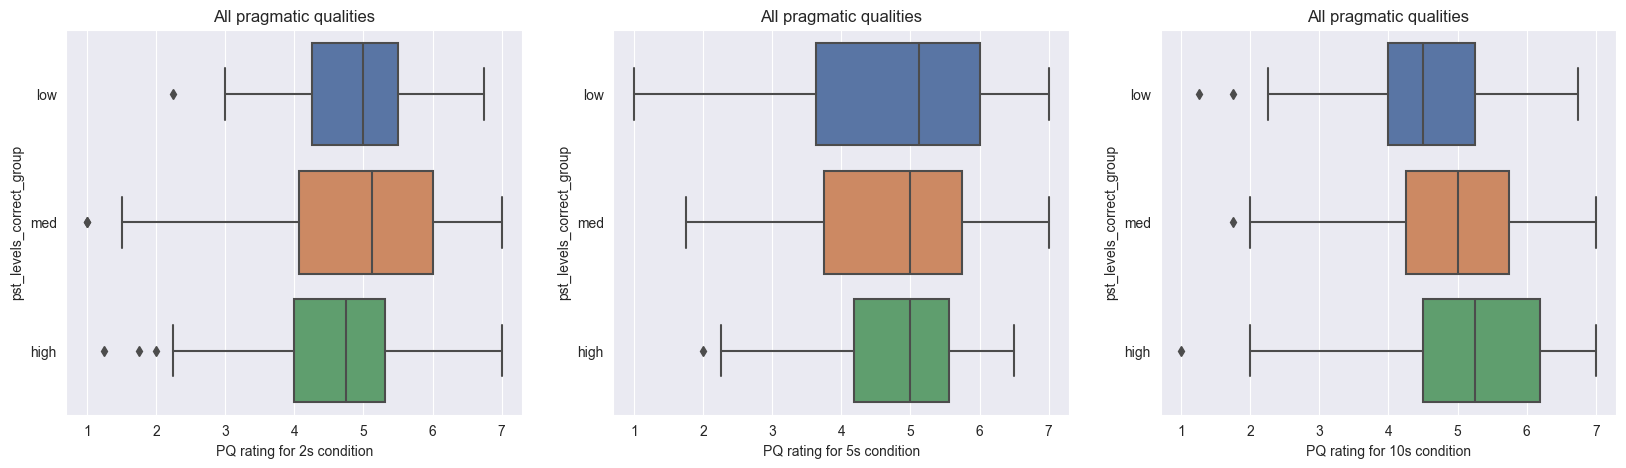

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'PQ', 'pst_levels_correct_group', attrak['PQ'], 'PQ rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'PQ', 'pst_levels_correct_group', attrak['PQ'], 'PQ rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'PQ', 'pst_levels_correct_group', attrak['PQ'], 'PQ rating for 10s condition', ax3, order=['low', 'med', 'high'])

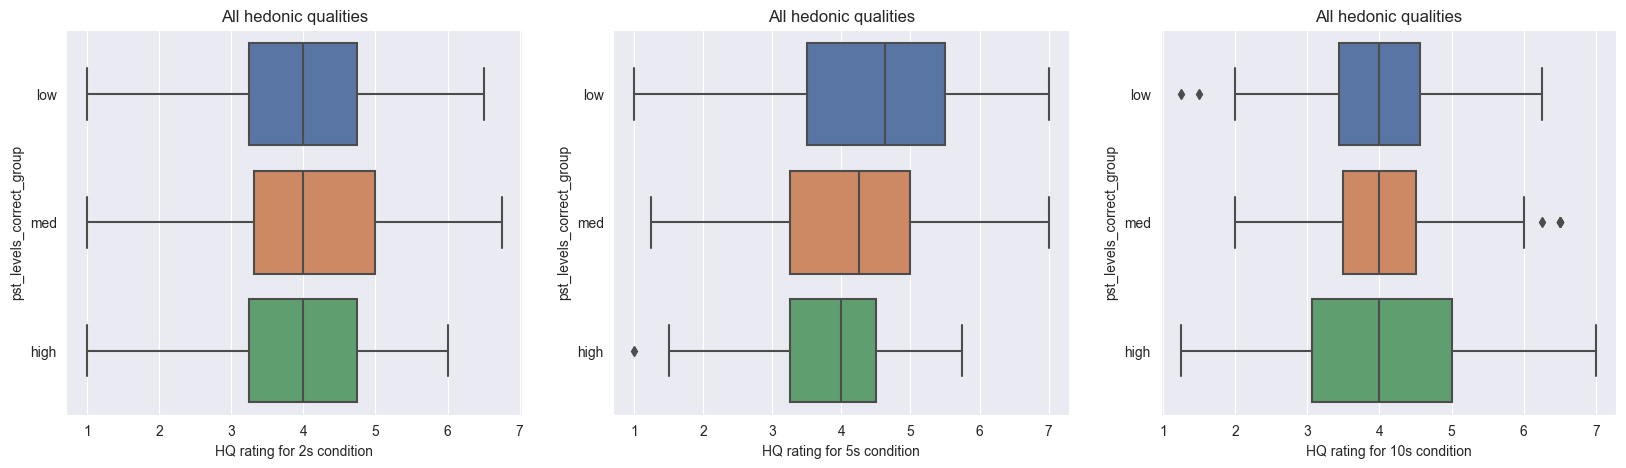

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'HQ', 'pst_levels_correct_group', attrak['HQ'], 'HQ rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'HQ', 'pst_levels_correct_group', attrak['HQ'], 'HQ rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'HQ', 'pst_levels_correct_group', attrak['HQ'], 'HQ rating for 10s condition', ax3, order=['low', 'med', 'high'])

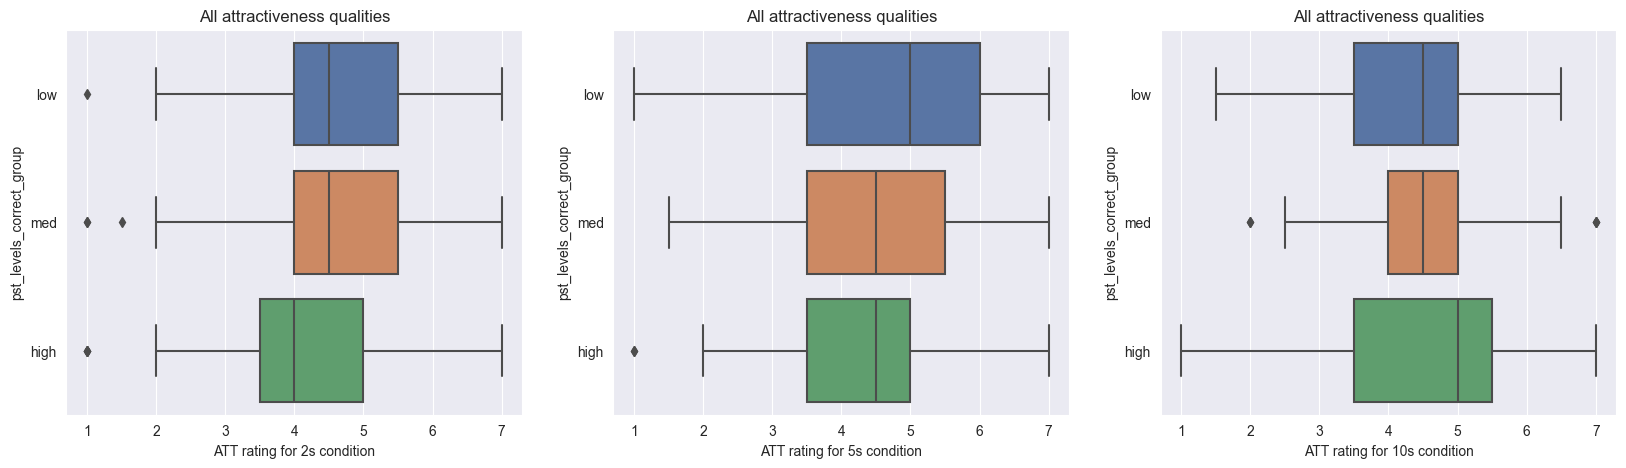

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'ATT', 'pst_levels_correct_group', attrak['ATT'], 'ATT rating for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'ATT', 'pst_levels_correct_group', attrak['ATT'], 'ATT rating for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'ATT', 'pst_levels_correct_group', attrak['ATT'], 'ATT rating for 10s condition', ax3, order=['low', 'med', 'high'])

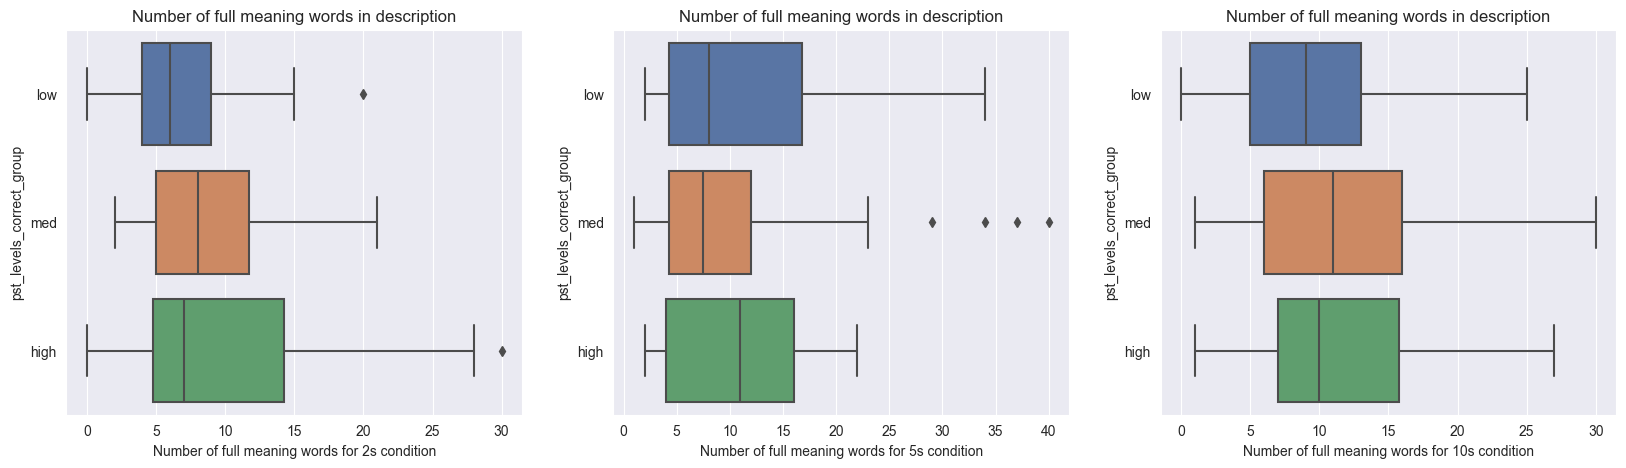

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'desc_token_count', 'pst_levels_correct_group', open_text['desc_token_count'], 'Number of full meaning words for 2s condition', ax1, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '5s'], 'desc_token_count', 'pst_levels_correct_group', open_text['desc_token_count'], 'Number of full meaning words for 5s condition', ax2, order=['low', 'med', 'high'])
my_box_xy(data[data.interval == '10s'], 'desc_token_count', 'pst_levels_correct_group', open_text['desc_token_count'], 'Number of full meaning words for 10s condition', ax3, order=['low', 'med', 'high'])

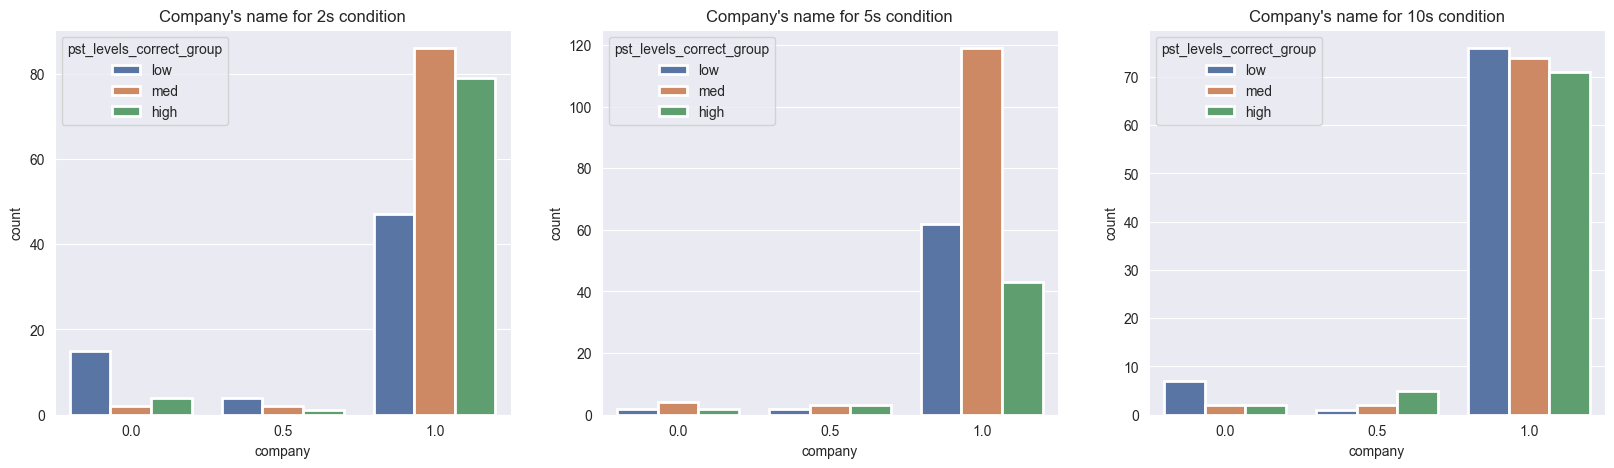

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

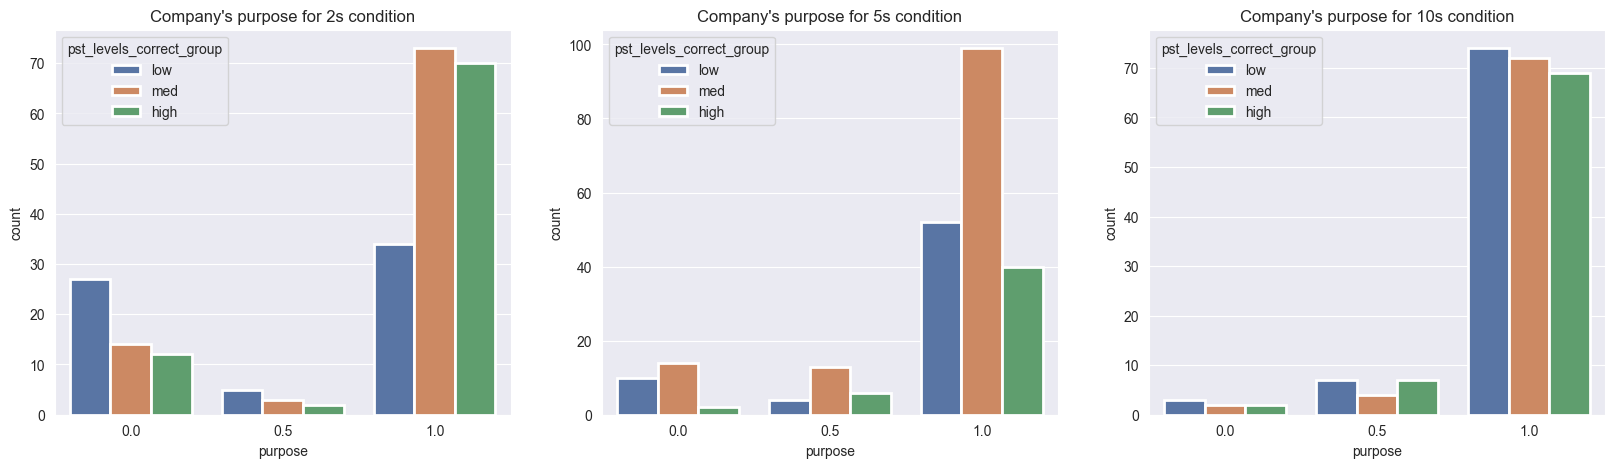

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

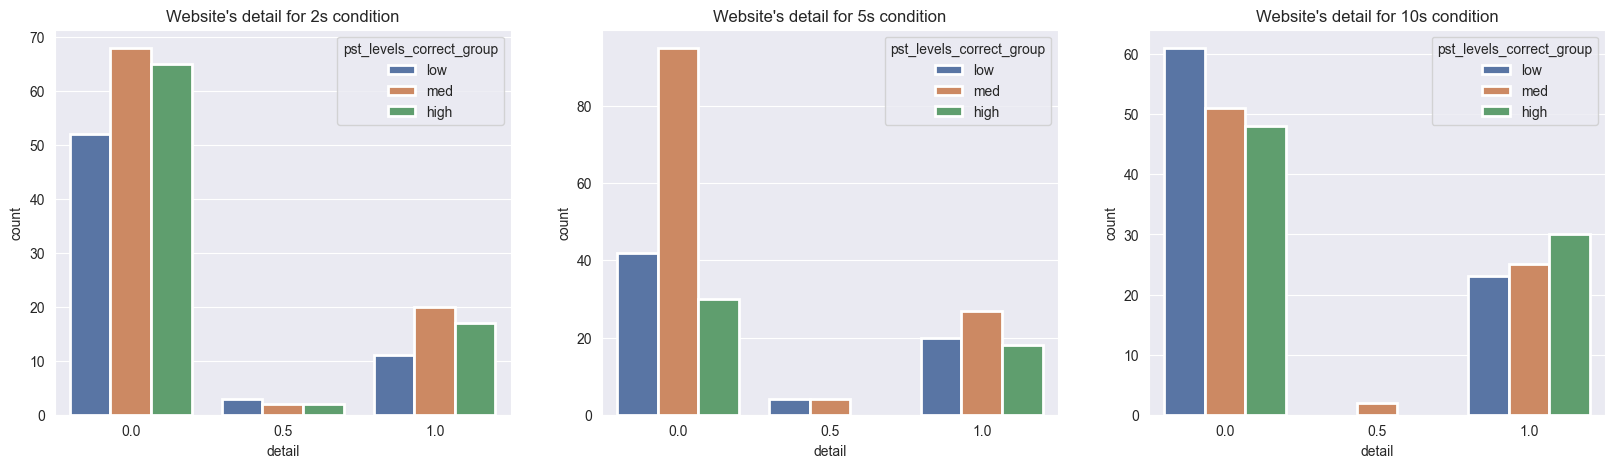

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

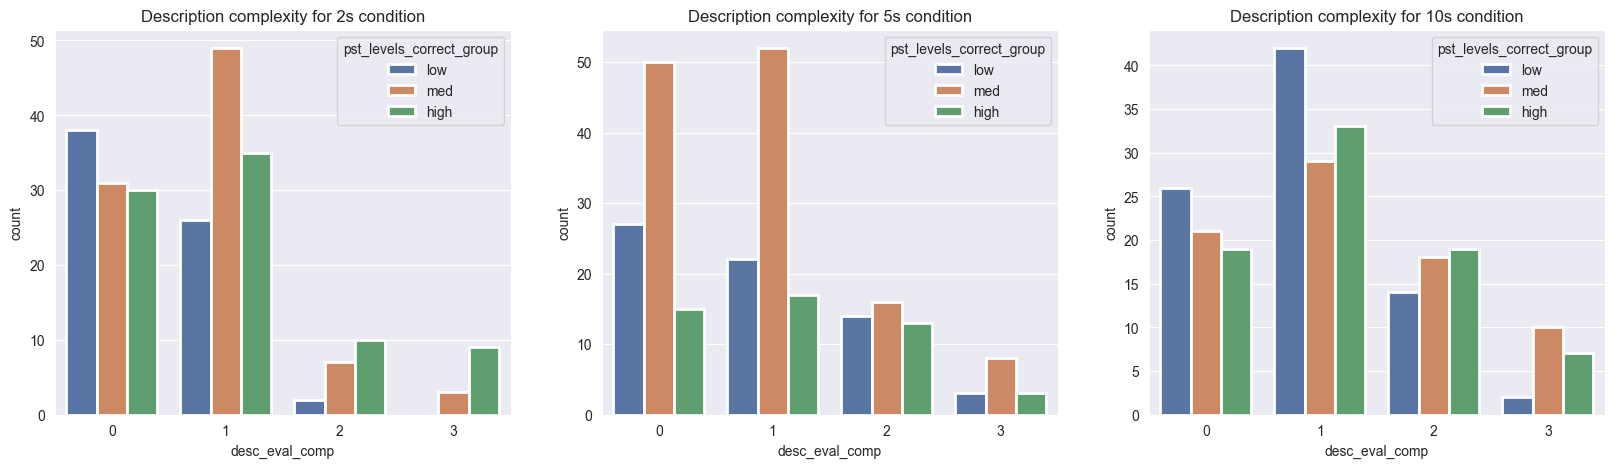

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

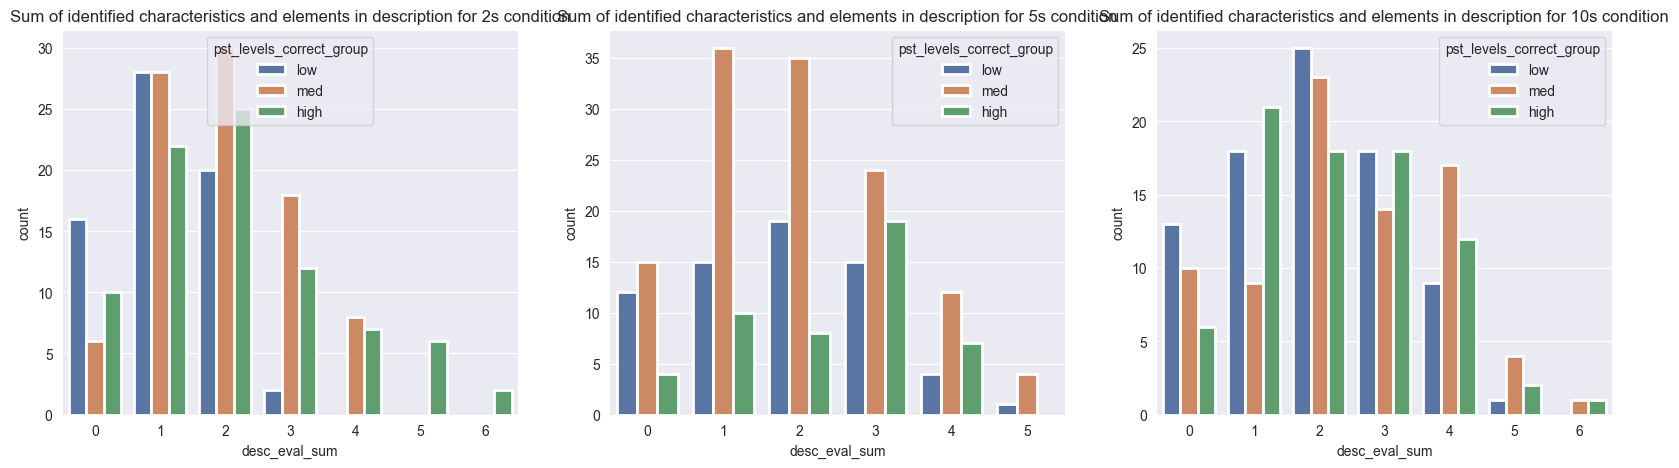

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [50]:
for col in ['company', 'purpose', 'detail', 'desc_eval_comp', 'desc_eval_sum']:
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
    my_bar_grouped(data[data.interval == '2s'], col, 'pst_levels_correct_group', open_text[col] + ' for 2s condition', ax=ax1, hue_order=['low', 'med', 'high'])
    my_bar_grouped(data[data.interval == '5s'], col, 'pst_levels_correct_group', open_text[col] + ' for 5s condition', ax=ax2, hue_order=['low', 'med', 'high'])
    my_bar_grouped(data[data.interval == '10s'], col, 'pst_levels_correct_group', open_text[col] + ' for 10s condition', ax=ax3, hue_order=['low', 'med', 'high'])

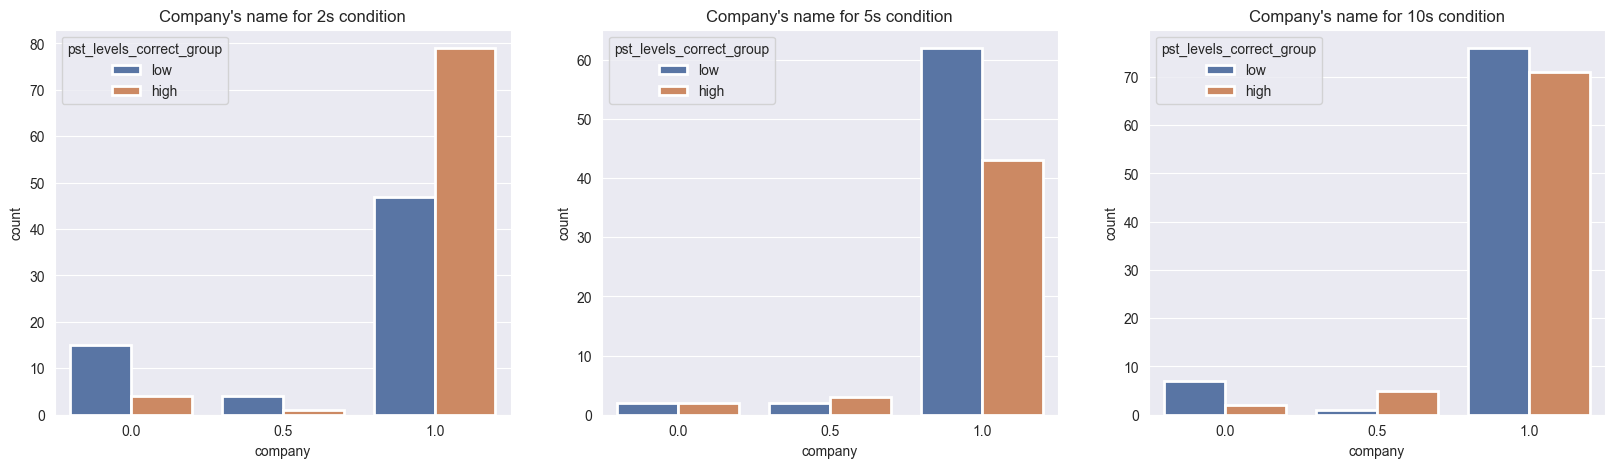

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

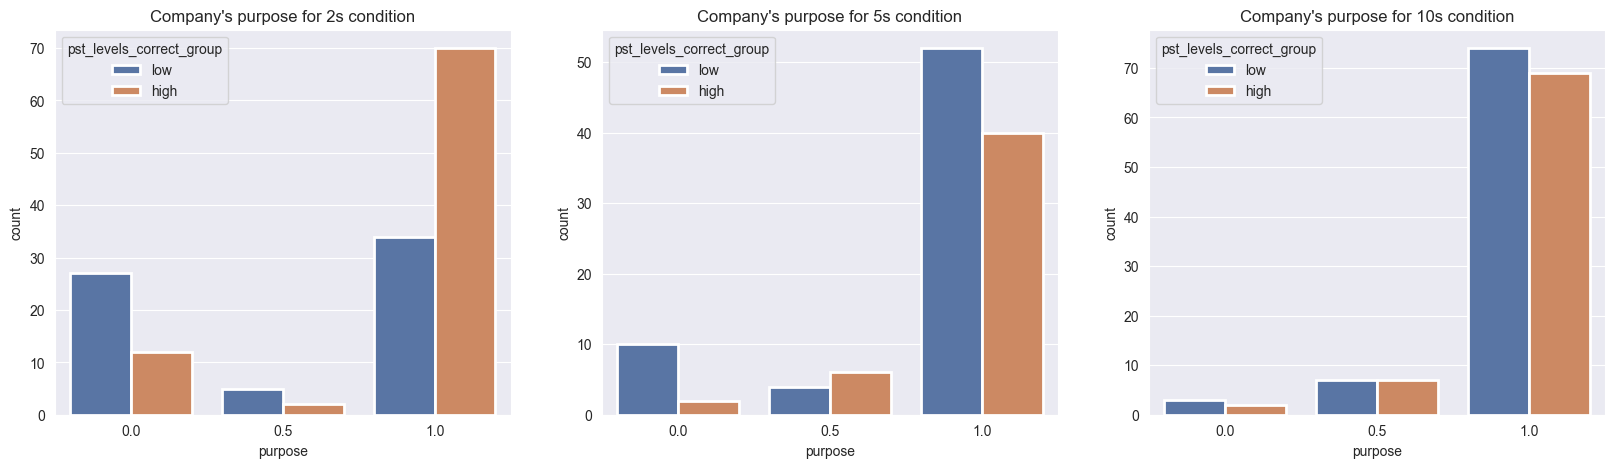

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

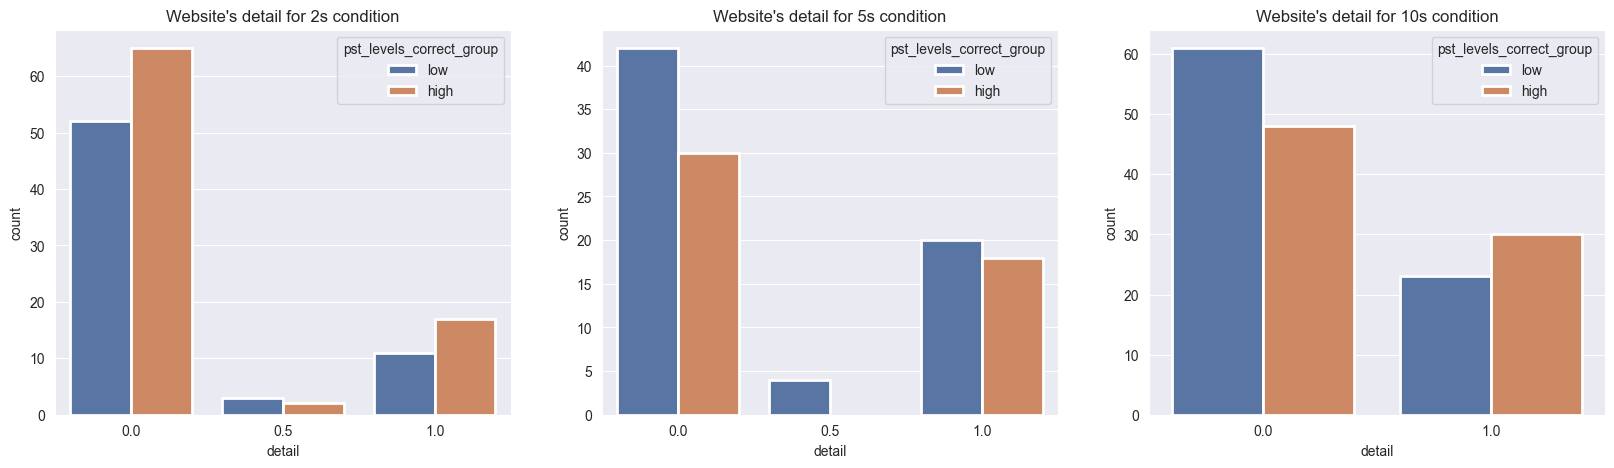

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

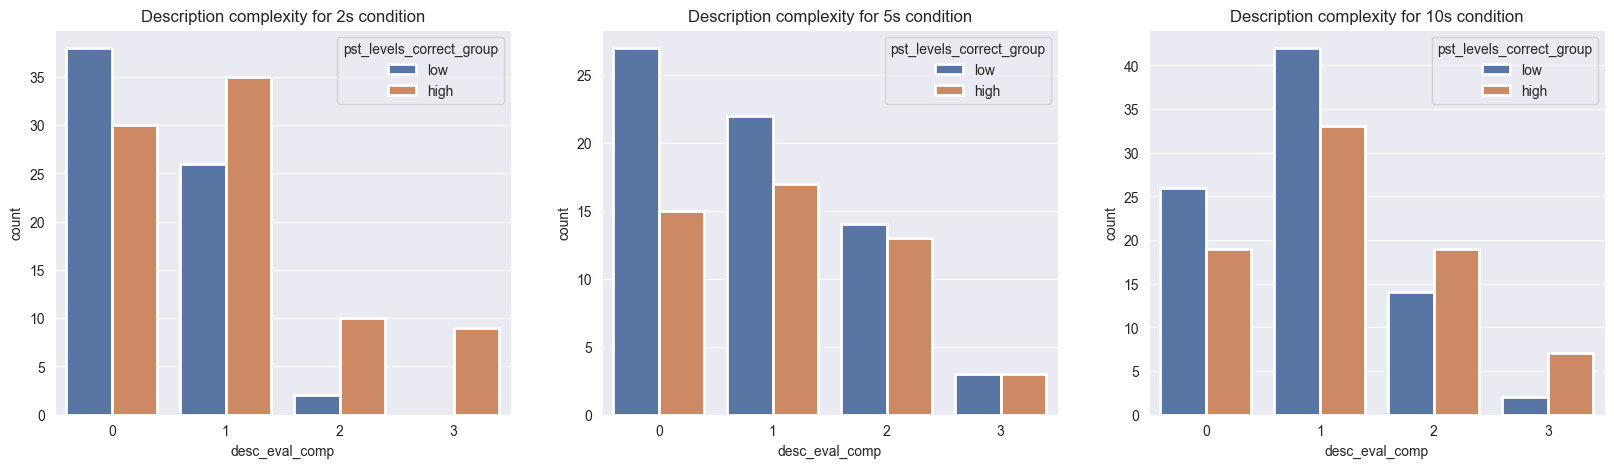

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

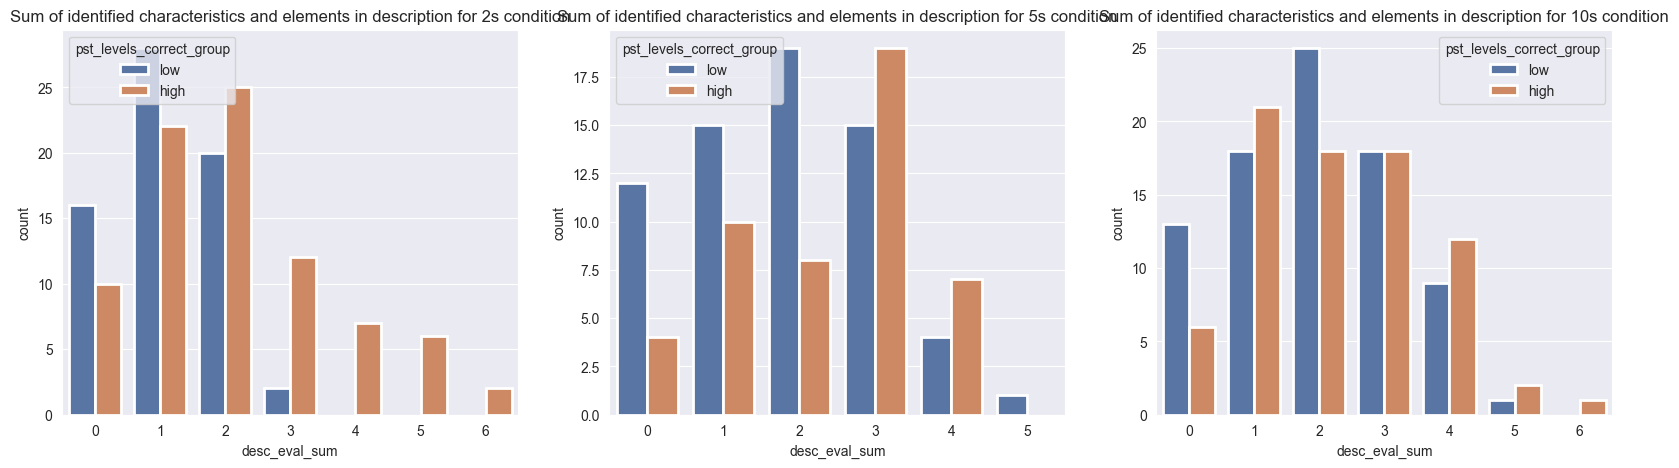

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [51]:
for col in ['company', 'purpose', 'detail', 'desc_eval_comp', 'desc_eval_sum']:
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
    my_bar_grouped(data[(data.interval == '2s') & (data.pst_levels_correct_group != 'med')], col, 'pst_levels_correct_group', open_text[col] + ' for 2s condition', ax=ax1, hue_order=['low', 'high'])
    my_bar_grouped(data[(data.interval == '5s') & (data.pst_levels_correct_group != 'med')], col, 'pst_levels_correct_group', open_text[col] + ' for 5s condition', ax=ax2, hue_order=['low', 'high'])
    my_bar_grouped(data[(data.interval == '10s') & (data.pst_levels_correct_group != 'med')], col, 'pst_levels_correct_group', open_text[col] + ' for 10s condition', ax=ax3, hue_order=['low', 'high'])

**Complexity and time interval - 2 sec vs. 5 sec.**

In [52]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '10s'], column, 'pst_interval', column)

PQ
KruskalResult(statistic=7.433221833427221, pvalue=0.19036254410468)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
 pvalue: 0.19036254410468

HQ
KruskalResult(statistic=8.63526117428352, pvalue=0.12452702269513381)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
 pvalue: 0.12452702269513381

ATT
KruskalResult(statistic=9.50351577925195, pvalue=0.09058902328074817)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
 pvalue: 0.09058902328074817



In [53]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '10s'], column, 'pst_interval', column)

desc_token_count
KruskalResult(statistic=11.388405765893527, pvalue=0.044200273876753134)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
----> pvalue: 0.044200273876753134

Post-hoc testing:
('med_2s', 'low_2s')   0.135846140912771                   0
('med_2s', 'high_2s')  0.9771175083743323                   0
('med_2s', 'low_5s')  0.7122904720689227                   0
('med_2s', 'med_5s')  0.7122904720689227                   0
('med_2s', 'high_5s') 0.18975402581113368                   0
('low_2s', 'high_2s') 0.17264128071709803                   0
('low_2s', 'low_5s')   0.135846140912771                   0
('low_2s', 'med_5s') 0.18975402581113368                   0
('low_2s', 'high_5s')0.014520819083697163                   1
('high_2s', 'low_5s')  0.7122904720689227                   0
('high_2s', 'med_5s')  0.7294949905569946                   0
('high_2s', 'high_5s')  0.4429206875092037                   0
('low_5s', 'med_5s')  0.5001016402568583                   0
('low_5s', 'high_5

**Complexity and time interval - 5 sec vs. 10 sec.**

In [54]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'pst_interval', column)

PQ
KruskalResult(statistic=14.488971231352762, pvalue=0.012784319660761273)
(66,)
(126,)
(48,)
(78,)
(78,)
(84,)
----> pvalue: 0.012784319660761273

Post-hoc testing:
('low_5s', 'med_5s')  0.4472016040809286                   0
('low_5s', 'high_5s') 0.49345180496934143                   0
('low_5s', 'med_10s')  0.7560447860562095                   0
('low_5s', 'high_10s')  0.7560447860562095                   0
('low_5s', 'low_10s') 0.07158308356422255                   0
('med_5s', 'high_5s')  0.8992743197428082                   0
('med_5s', 'med_10s')  0.4472016040809286                   0
('med_5s', 'high_10s') 0.22560488759313632                   0
('med_5s', 'low_10s') 0.22560488759313632                   0
('high_5s', 'med_10s')  0.5811546389480069                   0
('high_5s', 'high_10s') 0.28180257885315807                   0
('high_5s', 'low_10s') 0.24193595524404243                   0
('med_10s', 'high_10s')  0.4472016040809286                   0
('med_10s', 'low_10s

In [55]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'pst_interval', column)

desc_token_count
KruskalResult(statistic=15.710515352489102, pvalue=0.00772105249013006)
(66,)
(126,)
(48,)
(78,)
(78,)
(84,)
----> pvalue: 0.00772105249013006

Post-hoc testing:
('low_5s', 'med_5s') 0.45009147623117246                   0
('low_5s', 'high_5s')  0.8674305899968136                   0
('low_5s', 'med_10s') 0.45009147623117246                   0
('low_5s', 'high_10s')  0.3552301465457022                   0
('low_5s', 'low_10s')  0.8674305899968136                   0
('med_5s', 'high_5s') 0.16006737563507797                   0
('med_5s', 'med_10s')0.017289802924294256                   1
('med_5s', 'high_10s')0.014813174661729716                   1
('med_5s', 'low_10s') 0.45009147623117246                   0
('high_5s', 'med_10s')  0.7332023822912654                   0
('high_5s', 'high_10s')  0.8201507777770162                   0
('high_5s', 'low_10s')  0.3552301465457022                   0
('med_10s', 'high_10s')   0.874493223021083                   0
('med_10

**Complexity and time interval - 2 sec vs. 10 sec.**

In [56]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'pst_interval', column)

PQ
KruskalResult(statistic=21.031300652753522, pvalue=0.0007991031856773512)
(90,)
(66,)
(84,)
(78,)
(78,)
(84,)
----> pvalue: 0.0007991031856773512

Post-hoc testing:
('med_2s', 'low_2s')  0.2684471616312383                   0
('med_2s', 'high_2s')0.054776267352926185                   0
('med_2s', 'med_10s')  0.8060612143014311                   0
('med_2s', 'high_10s')  0.5773676159930665                   0
('med_2s', 'low_10s')0.020024655368120474                   1
('low_2s', 'high_2s')  0.2684471616312383                   0
('low_2s', 'med_10s')  0.2684471616312383                   0
('low_2s', 'high_10s') 0.08076094212919052                   0
('low_2s', 'low_10s')  0.1311994781879616                   0
('high_2s', 'med_10s') 0.03780604422860843                   1
('high_2s', 'high_10s')0.016451953629981208                   1
('high_2s', 'low_10s')  0.5773676159930665                   0
('med_10s', 'high_10s')  0.3598680389184776                   0
('med_10s', 'low_10

In [57]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'pst_interval', column)

desc_token_count
KruskalResult(statistic=29.21699013232552, pvalue=2.1021882926309766e-05)
(90,)
(66,)
(84,)
(78,)
(78,)
(84,)
----> pvalue: 2.1021882926309766e-05

Post-hoc testing:
('med_2s', 'low_2s')0.045465326070886034                   1
('med_2s', 'high_2s')  0.9771175083743323                   0
('med_2s', 'med_10s')0.022016878370049342                   1
('med_2s', 'high_10s')0.021264450883769985                   1
('med_2s', 'low_10s')  0.6428471352764883                   0
('low_2s', 'high_2s') 0.07847330941686274                   0
('low_2s', 'med_10s')0.00015523398991350916                   1
('low_2s', 'high_10s')4.5967017766515285e-05                   1
('low_2s', 'low_10s')0.021264450883769985                   1
('high_2s', 'med_10s') 0.05190772237877784                   0
('high_2s', 'high_10s')0.045465326070886034                   1
('high_2s', 'low_10s')   0.801539602184681                   0
('med_10s', 'high_10s')  0.9369570246654461                   0


**Complexity and time - all groups**

In [58]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data, column, 'pst_interval', column)

PQ
KruskalResult(statistic=21.46774284905601, pvalue=0.006003419640053074)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
(78,)
(78,)
(84,)
----> pvalue: 0.006003419640053074

Post-hoc testing:
('med_2s', 'low_2s') 0.38517760048299987                   0
('med_2s', 'high_2s') 0.11268260712601959                   0
('med_2s', 'low_5s')  0.8992743197428082                   0
('med_2s', 'med_5s') 0.42251544134358326                   0
('med_2s', 'high_5s')  0.5010433711996389                   0
('med_2s', 'med_10s')  0.8793395065106521                   0
('med_2s', 'high_10s')  0.6471245520648375                   0
('med_2s', 'low_10s') 0.04805917288348913                   1
('low_2s', 'high_2s') 0.38517760048299987                   0
('low_2s', 'low_5s') 0.38517760048299987                   0
('low_2s', 'med_5s')  0.8992743197428082                   0
('low_2s', 'high_5s')  0.8576223068374893                   0
('low_2s', 'med_10s') 0.38517760048299987                   0
('low_2s', 'hi

In [59]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data, column, 'pst_interval', column)

desc_token_count
KruskalResult(statistic=32.248150657313474, pvalue=8.407463094593928e-05)
(90,)
(66,)
(84,)
(66,)
(126,)
(48,)
(78,)
(78,)
(84,)
----> pvalue: 8.407463094593928e-05

Post-hoc testing:
('med_2s', 'low_2s') 0.07554238793316448                   0
('med_2s', 'high_2s')  0.9771175083743323                   0
('med_2s', 'low_5s')  0.7073781239856888                   0
('med_2s', 'med_5s')  0.7061807180296049                   0
('med_2s', 'high_5s') 0.17497610008800443                   0
('med_2s', 'med_10s') 0.03302531755507401                   1
('med_2s', 'high_10s')0.029162675497741694                   1
('med_2s', 'low_10s')  0.7061807180296049                   0
('low_2s', 'high_2s') 0.12948096053782354                   0
('low_2s', 'low_5s') 0.07554238793316448                   0
('low_2s', 'med_5s') 0.17710375742372478                   0
('low_2s', 'high_5s') 0.00888790479703783                   1
('low_2s', 'med_10s')0.00037256157579242203                

**Complexity and time interval - categorical variables.**

In [60]:
my_chi(data, 'company', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
company                                                                      
0.0                  7        5        5        8      19       4        4   
1.0                 71       79       43       76      47      62       74   

pst_interval  med_2s  med_5s  
company                       
0.0                4       7  
1.0               86     119  

----> pvalue: 3.449629161869821e-06

stat = 39.82751755745885, df = 8
expected frequencies:
[[  6.825   7.35    4.2     7.35    5.775   5.775   6.825   7.875  11.025]
 [ 71.175  76.65   43.8    76.65   60.225  60.225  71.175  82.125 114.975]]

Post-hoc testing:
('high_10s', 'high_2s')                 1.0                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s')                 1.0                   0
('high_10s', 'low_2s') 0.02180914856879121                   1
('high_10s', 'low_5s')                 1.0   

In [78]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'company', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
company                                                          
0.0                  7        5        5        8      19       4
1.0                 71       79       43       76      47      62

----> pvalue: 0.00013166409059373074

stat = 25.127312378428453, df = 5
expected frequencies:
[[ 8.78873239  9.46478873  5.4084507   9.46478873  7.43661972  7.43661972]
 [69.21126761 74.53521127 42.5915493  74.53521127 58.56338028 58.56338028]]

Post-hoc testing:
('high_10s', 'high_2s')                 1.0                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s')                 1.0                   0
('high_10s', 'low_2s')0.018291543960921655                   1
('high_10s', 'low_5s')                 1.0                   0
('high_2s', 'high_5s')                 1.0                   0
('high_2s', 'low_10s')                 1.0                   0
('high_2s', 'low_2s')0.0055

In [62]:
my_chi(data, 'purpose', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
purpose                                                                      
0.0                  9       14        8       10      32      14        6   
1.0                 69       70       40       74      34      52       72   

pst_interval  med_2s  med_5s  
purpose                       
0.0               17      27  
1.0               73      99  

----> pvalue: 3.3695766746569894e-08

stat = 50.43586029225373, df = 8
expected frequencies:
[[ 14.84166667  15.98333333   9.13333333  15.98333333  12.55833333
   12.55833333  14.84166667  17.125       23.975     ]
 [ 63.15833333  68.01666667  38.86666667  68.01666667  53.44166667
   53.44166667  63.15833333  72.875      102.025     ]]

Post-hoc testing:
('high_10s', 'high_2s')  0.7790704746335453                   0
('high_10s', 'high_5s')  0.7790704746335453                   0
('high_10s', 'low_10s')                 1.0                   0
('high_10s', 

In [79]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'purpose', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
purpose                                                          
0.0                  9       14        8       10      32      14
1.0                 69       70       40       74      34      52

----> pvalue: 1.0837250248728652e-07

stat = 40.690098224428404, df = 5
expected frequencies:
[[15.92957746 17.15492958  9.8028169  17.15492958 13.47887324 13.47887324]
 [62.07042254 66.84507042 38.1971831  66.84507042 52.52112676 52.52112676]]

Post-hoc testing:
('high_10s', 'high_2s')  0.9165534995688769                   0
('high_10s', 'high_5s')  0.9165534995688769                   0
('high_10s', 'low_10s')                 1.0                   0
('high_10s', 'low_2s')2.7662037443988116e-05                   1
('high_10s', 'low_5s')  0.3580396133716853                   0
('high_2s', 'high_5s')                 1.0                   0
('high_2s', 'low_10s')  0.9165534995688769                   0
('high_2s', 'low_2s')0.00

In [64]:
my_chi(data, 'detail', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
detail                                                                       
0.0               48.0     67.0     30.0     61.0    55.0    46.0     53.0   
1.0               30.0     17.0     18.0     23.0    11.0    20.0     25.0   

pst_interval  med_2s  med_5s  
detail                        
0.0             70.0    99.0  
1.0             20.0    27.0  

----> pvalue: 0.021727367071080667

stat = 17.933923082628034, df = 8
expected frequencies:
[[57.30833333 61.71666667 35.26666667 61.71666667 48.49166667 48.49166667
  57.30833333 66.125      92.575     ]
 [20.69166667 22.28333333 12.73333333 22.28333333 17.50833333 17.50833333
  20.69166667 23.875      33.425     ]]

Post-hoc testing:
('high_10s', 'high_2s') 0.24958693680723293                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s')  0.3889914813835162                   0
('high_10s', 'low_2s') 0.2495869

In [65]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'detail', 'pst_interval', {0: [0.5]})

pst_interval  high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
detail                                                           
0.0               48.0     67.0     30.0     61.0    55.0    46.0
1.0               30.0     17.0     18.0     23.0    11.0    20.0

----> pvalue: 0.020670731251662636

stat = 13.306379520897902, df = 5
expected frequencies:
[[56.21126761 60.53521127 34.5915493  60.53521127 47.56338028 47.56338028]
 [21.78873239 23.46478873 13.4084507  23.46478873 18.43661972 18.43661972]]

Post-hoc testing:
('high_10s', 'high_2s') 0.12315391901844765                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s') 0.35117286513789653                   0
('high_10s', 'low_2s') 0.10399455700301373                   0
('high_10s', 'low_5s') 0.35117286513789653                   0
('high_2s', 'high_5s') 0.15930314989686903                   0
('high_2s', 'low_10s') 0.35117286513789653                   0
('high_2s', 'low_2s')  0.6214

In [66]:
my_chi(data, 'desc_eval_comp', 'pst_interval', {0: [1], 2: [3]})

pst_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_comp                                                                 
0                   52.0     65.0     32.0     68.0    64.0    49.0     50.0   
2                   26.0     19.0     16.0     16.0     2.0    17.0     28.0   

pst_interval    med_2s  med_5s  
desc_eval_comp                  
0                 80.0   102.0  
2                 10.0    24.0  

----> pvalue: 3.2466127497788548e-06

stat = 39.96898997214326, df = 8
expected frequencies:
[[60.88333333 65.56666667 37.46666667 65.56666667 51.51666667 51.51666667
  60.88333333 70.25       98.35      ]
 [17.11666667 18.43333333 10.53333333 18.43333333 14.48333333 14.48333333
  17.11666667 19.75       27.65      ]]

Post-hoc testing:
('high_10s', 'high_2s') 0.15019475561213044                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s') 0.09073238218678223                   0
('high_10s', 'l

In [67]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'desc_eval_comp', 'pst_interval', {0: [1], 2: [3]})

pst_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_eval_comp                                                     
0                   52.0     65.0     32.0     68.0    64.0    49.0
2                   26.0     19.0     16.0     16.0     2.0    17.0

----> pvalue: 0.0002395465341778773

stat = 23.77764782565919, df = 5
expected frequencies:
[[60.42253521 65.07042254 37.18309859 65.07042254 51.12676056 51.12676056]
 [17.57746479 18.92957746 10.81690141 18.92957746 14.87323944 14.87323944]]

Post-hoc testing:
('high_10s', 'high_2s') 0.21711443232196528                   0
('high_10s', 'high_5s')                 1.0                   0
('high_10s', 'low_10s') 0.10310497975770709                   0
('high_10s', 'low_2s')0.0001891782360045323                   1
('high_10s', 'low_5s') 0.43384886399029843                   0
('high_2s', 'high_5s') 0.26723923164139973                   0
('high_2s', 'low_10s')  0.5488133707467105                   0
('high_2s', 'low_2s'

In [68]:
my_chi(data, 'desc_eval_elem', 'pst_interval', {1: [2], 3: [4, 5]})

pst_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_elem                                                                 
0                   13.0     16.0      6.0     14.0    24.0    19.0     16.0   
1                   38.0     49.0     29.0     49.0    42.0    39.0     33.0   
3                   27.0     19.0     13.0     21.0     0.0     8.0     29.0   

pst_interval    med_2s  med_5s  
desc_eval_elem                  
0                 13.0    29.0  
1                 65.0    76.0  
3                 12.0    21.0  

----> pvalue: 3.0954504548845117e-07

stat = 61.3497459683174, df = 16
expected frequencies:
[[16.25 17.5  10.   17.5  13.75 13.75 16.25 18.75 26.25]
 [45.5  49.   28.   49.   38.5  38.5  45.5  52.5  73.5 ]
 [16.25 17.5  10.   17.5  13.75 13.75 16.25 18.75 26.25]]

Post-hoc testing:
('high_10s', 'high_2s') 0.11970217164030121                   0
('high_10s', 'high_5s') 0.18400037390299517                   0
('high_10s', 'low_10s

In [69]:
my_chi(data, 'desc_eval_char', 'pst_interval', {1: [2, 3]})

pst_interval    high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_char                                                                 
0                   57.0     50.0     30.0     67.0    52.0    40.0     48.0   
1                   21.0     34.0     18.0     17.0    14.0    26.0     30.0   

pst_interval    med_2s  med_5s  
desc_eval_char                  
0                 56.0    59.0  
1                 34.0    67.0  

----> pvalue: 2.1209658959313314e-05

stat = 35.5515388375429, df = 8
expected frequencies:
[[49.725 53.55  30.6   53.55  42.075 42.075 49.725 57.375 80.325]
 [28.275 30.45  17.4   30.45  23.925 23.925 28.275 32.625 45.675]]

Post-hoc testing:
('high_10s', 'high_2s') 0.14359308669662293                   0
('high_10s', 'high_5s') 0.25384084379008764                   0
('high_10s', 'low_10s')  0.3818646975572709                   0
('high_10s', 'low_2s')  0.5813694167918452                   0
('high_10s', 'low_5s') 0.15947868230624881     

In [70]:
my_chi(data, 'desc_eval_sum', 'pst_interval', {1: [2, 3], 4: [5, 6]})

pst_interval   high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  med_10s  \
desc_eval_sum                                                                 
0                   6.0     10.0      4.0     13.0    16.0    12.0     10.0   
1                  57.0     59.0     37.0     61.0    50.0    49.0     46.0   
4                  15.0     15.0      7.0     10.0     0.0     5.0     22.0   

pst_interval   med_2s  med_5s  
desc_eval_sum                  
0                 6.0    15.0  
1                76.0    95.0  
4                 8.0    16.0  

----> pvalue: 0.00011539233846696415

stat = 45.52184129677223, df = 16
expected frequencies:
[[ 9.96666667 10.73333333  6.13333333 10.73333333  8.43333333  8.43333333
   9.96666667 11.5        16.1       ]
 [57.41666667 61.83333333 35.33333333 61.83333333 48.58333333 48.58333333
  57.41666667 66.25       92.75      ]
 [10.61666667 11.43333333  6.53333333 11.43333333  8.98333333  8.98333333
  10.61666667 12.25       17.15      ]]

Post-hoc

In [71]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'desc_eval_sum', 'pst_interval', {1: [2, 3], 4: [5, 6]})

pst_interval   high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_eval_sum                                                     
0                   6.0     10.0      4.0     13.0    16.0    12.0
1                  57.0     59.0     37.0     61.0    50.0    49.0
4                  15.0     15.0      7.0     10.0     0.0     5.0

----> pvalue: 0.006839489404828649

stat = 24.301336309157968, df = 10
expected frequencies:
[[11.16901408 12.02816901  6.87323944 12.02816901  9.45070423  9.45070423]
 [57.30985915 61.71830986 35.26760563 61.71830986 48.49295775 48.49295775]
 [ 9.52112676 10.25352113  5.85915493 10.25352113  8.05633803  8.05633803]]

Post-hoc testing:
('high_10s', 'high_2s')  0.6131734936992217                   0
('high_10s', 'high_5s')  0.6131734936992217                   0
('high_10s', 'low_10s') 0.21069002846197904                   0
('high_10s', 'low_2s')0.0010488881716109362                   1
('high_10s', 'low_5s') 0.08209458583789704                   0
('high_

In [72]:
my_chi(data, 'desc_word_count_group', 'pst_interval')

pst_interval           high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  \
desc_word_count_group                                                        
high                         33       24       23       27       8      24   
low                          11       33       15       27      32      27   
med                          34       27       10       30      26      15   

pst_interval           med_10s  med_2s  med_5s  
desc_word_count_group                           
high                        35      28      37  
low                         17      27      49  
med                         26      35      40  

----> pvalue: 6.226347689650144e-05

stat = 47.24945897468547, df = 16
expected frequencies:
[[25.89166667 27.88333333 15.93333333 27.88333333 21.90833333 21.90833333
  25.89166667 29.875      41.825     ]
 [25.78333333 27.76666667 15.86666667 27.76666667 21.81666667 21.81666667
  25.78333333 29.75       41.65      ]
 [26.325      28.35       16.2        28.35 

In [73]:
my_chi(data, 'desc_token_count_group', 'pst_interval')

pst_interval            high_10s  high_2s  high_5s  low_10s  low_2s  low_5s  \
desc_token_count_group                                                        
high                          30       23       21       24       5      21   
low                           12       27       14       23      22      25   
med                           36       34       13       37      39      20   

pst_interval            med_10s  med_2s  med_5s  
desc_token_count_group                           
high                         34      19      30  
low                          17      25      45  
med                          27      46      51  

----> pvalue: 3.047925946134221e-05

stat = 49.22143495490768, df = 16
expected frequencies:
[[22.425 24.15  13.8   24.15  18.975 18.975 22.425 25.875 36.225]
 [22.75  24.5   14.    24.5   19.25  19.25  22.75  26.25  36.75 ]
 [32.825 35.35  20.2   35.35  27.775 27.775 32.825 37.875 53.025]]

Post-hoc testing:
('high_10s', 'high_2s') 0.0552775708561562

In [74]:
my_chi(data[(data.pst_interval != 'med_2s') & (data.pst_interval != 'med_5s') & (data.pst_interval != 'med_10s')], 'desc_token_count_group', 'pst_interval')

pst_interval            high_10s  high_2s  high_5s  low_10s  low_2s  low_5s
desc_token_count_group                                                     
high                          30       23       21       24       5      21
low                           12       27       14       23      22      25
med                           36       34       13       37      39      20

----> pvalue: 0.00018588344511372016

stat = 33.98359723578437, df = 10
expected frequencies:
[[22.70422535 24.45070423 13.97183099 24.45070423 19.21126761 19.21126761]
 [22.52112676 24.25352113 13.85915493 24.25352113 19.05633803 19.05633803]
 [32.77464789 35.29577465 20.16901408 35.29577465 27.73239437 27.73239437]]

Post-hoc testing:
('high_10s', 'high_2s') 0.05085812413977394                   0
('high_10s', 'high_5s') 0.06076800774654174                   0
('high_10s', 'low_10s') 0.09584950631942592                   0
('high_10s', 'low_2s')0.00030878976767408447                   1
('high_10s', 'low_5s')0

## Most common words

In [75]:
from wordcloud import WordCloud










low
Task 1, word "image", p = 0.011931522535756151
Task 1, word "small", p = 0.0301973834223185


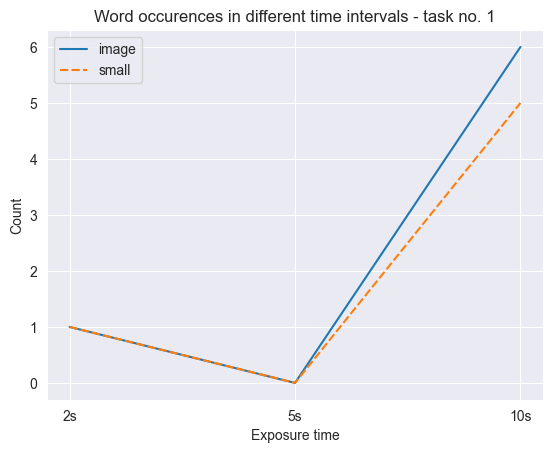

Task 2, word "contact", p = 0.036600539154270924
Task 2, word "lens", p = 0.04978706836786395
Task 2, word "glass", p = 0.013123728736940971


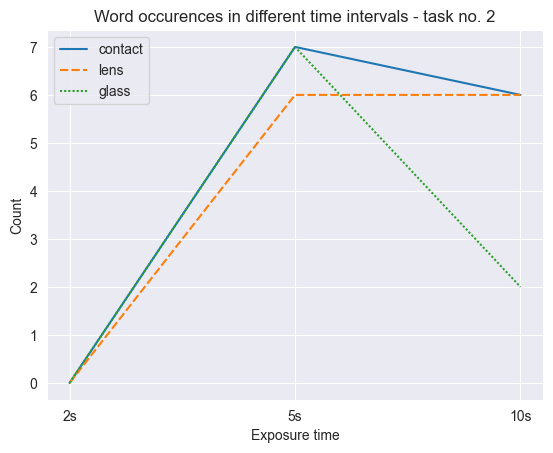

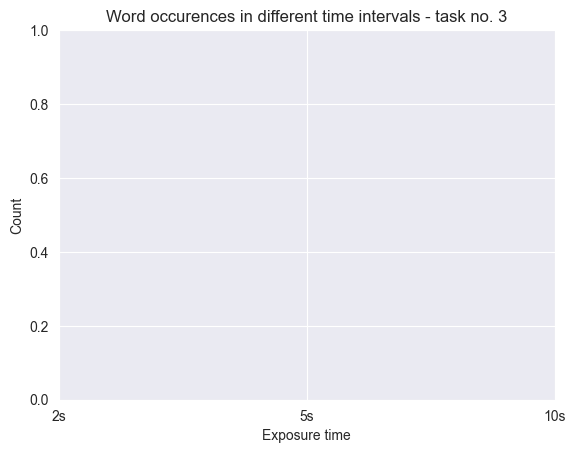

Task 4, word "blue", p = 0.0439369336234074
Task 4, word "hand", p = 0.006737946999085476
Task 4, word "rain", p = 0.018315638888734168


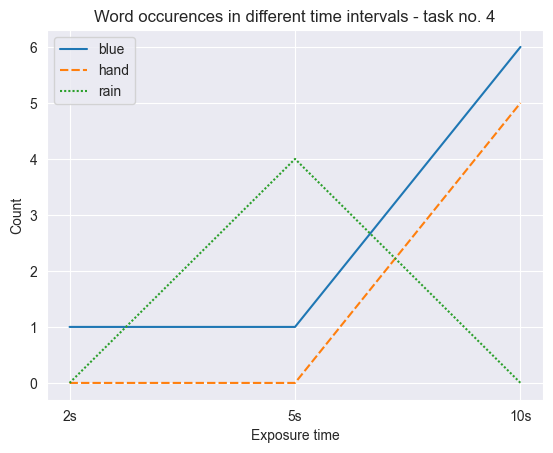

Task 5, word "animal", p = 0.02472352647033942


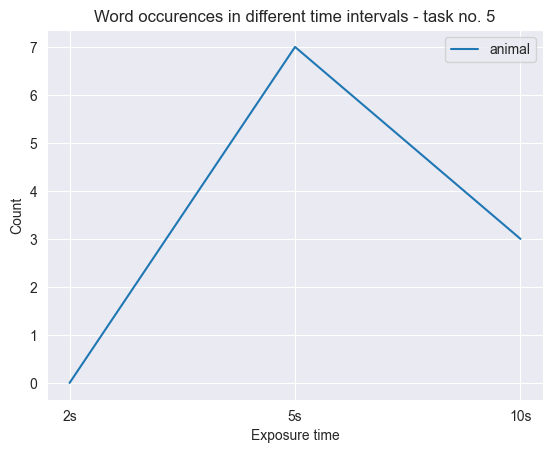

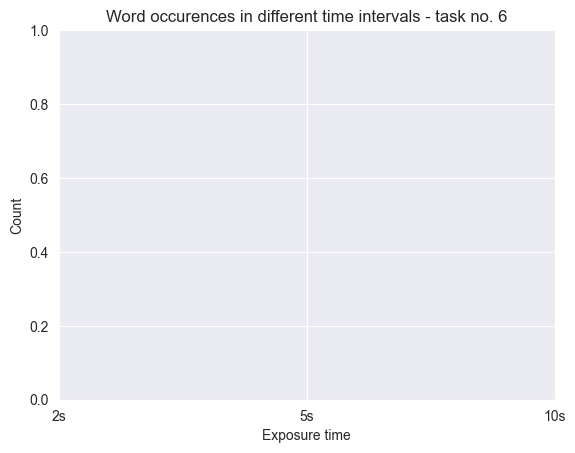










med


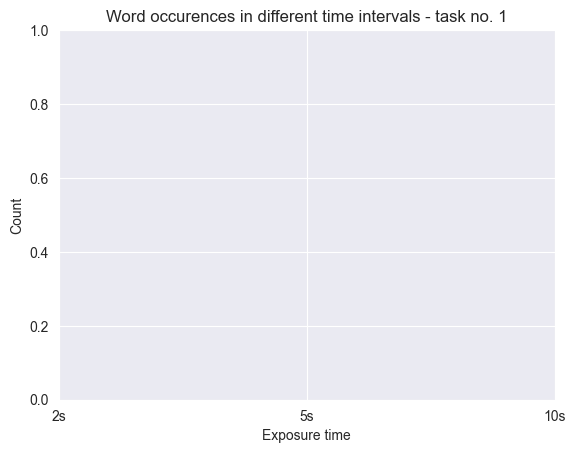

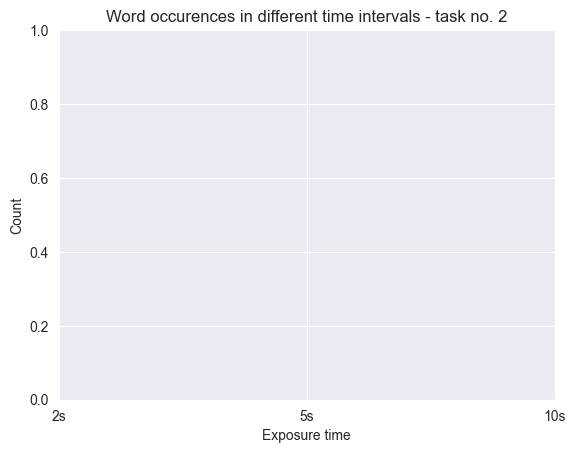

Task 3, word "top", p = 0.007446583070924346


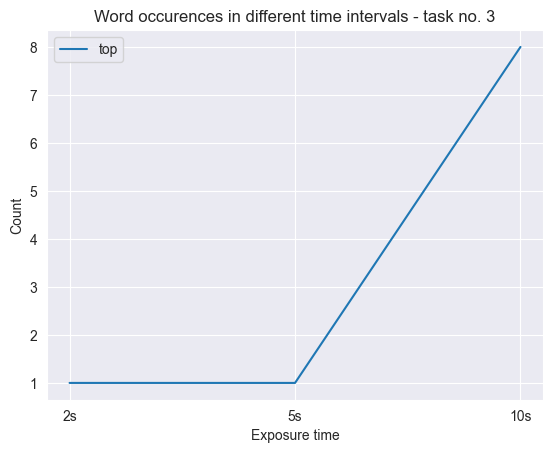

Task 4, word "prague", p = 4.539992976248493e-05
Task 4, word "showing", p = 0.030197383422318487


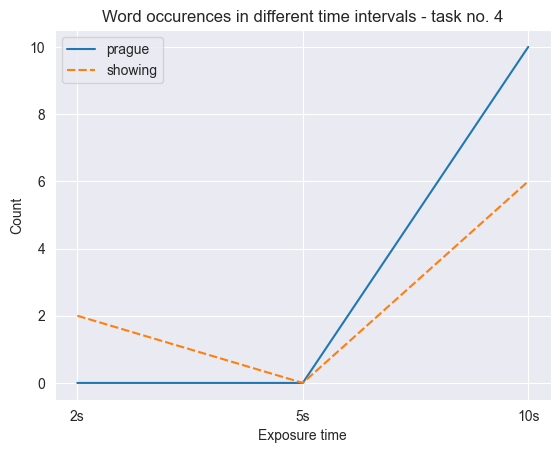

Task 5, word "yellow", p = 0.03877420783172202
Task 5, word "website", p = 0.03460917828870049


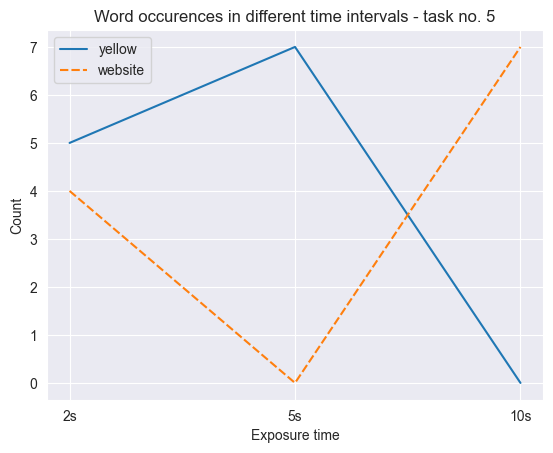

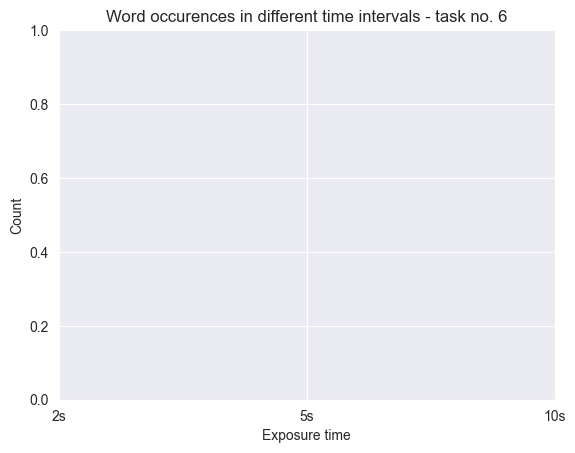










high


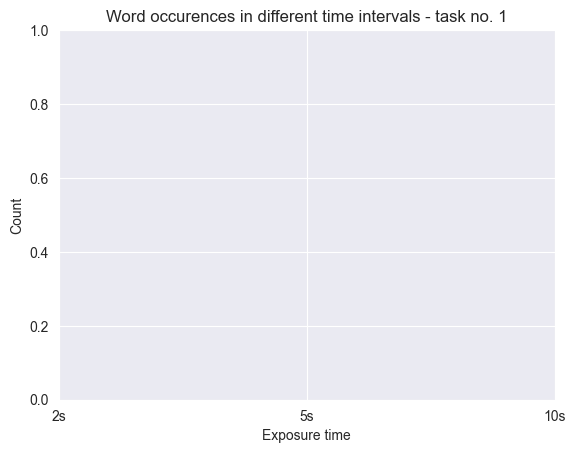

Task 2, word "glass", p = 0.03877420783172202


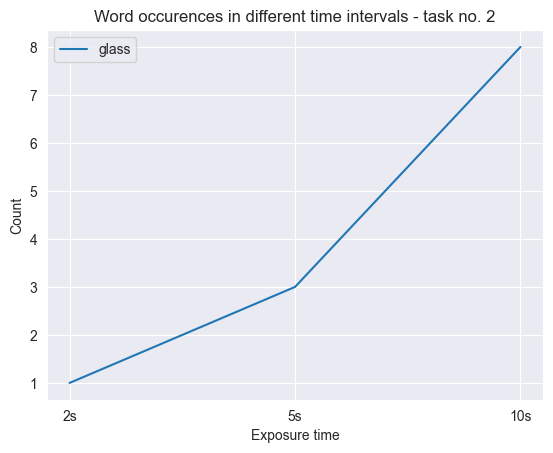

Task 3, word "image", p = 0.04504920239355782
Task 3, word "big", p = 0.013123728736940971
Task 3, word "section", p = 0.030197383422318487
Task 3, word "website", p = 0.011931522535756139


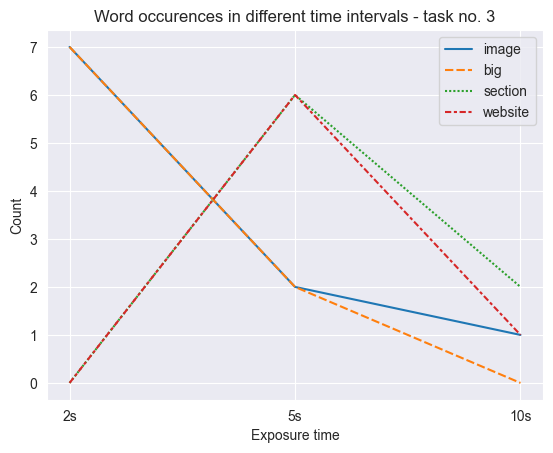

Task 4, word "information", p = 0.030197383422318508
Task 4, word "blue", p = 0.04504920239355782


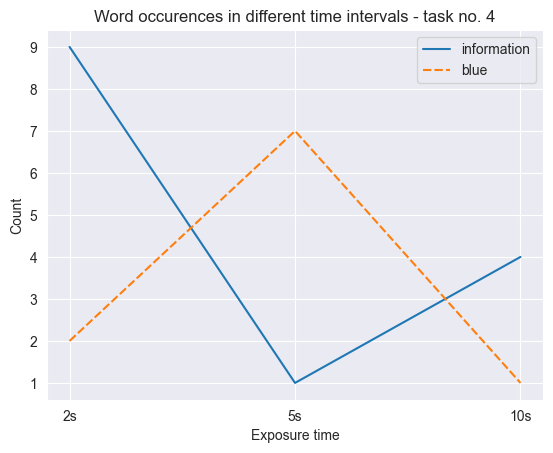

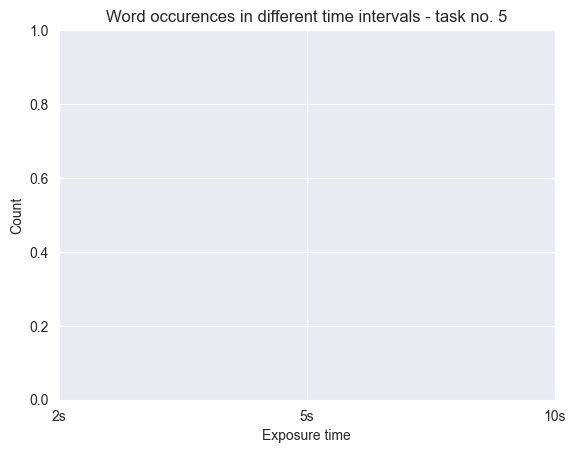

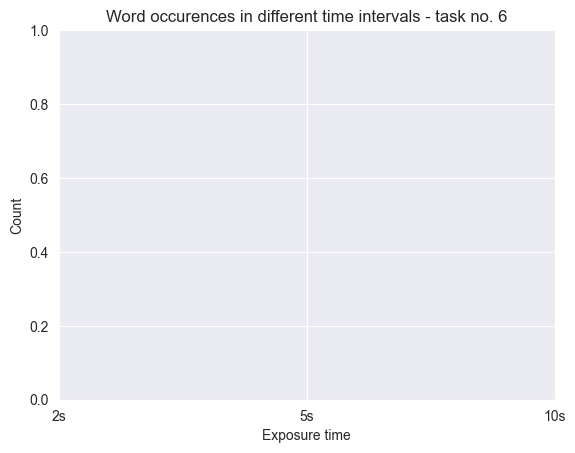

In [76]:
texts = {
    1: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    2: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    3: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    4: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    5: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    6: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
}

for index, row in data.iterrows():
    texts[row.task][row.interval][row.vmt_levels_group] += (row.desc_tokens + ' ') if type(row.desc_tokens) == str else ''

for group in ['low', 'med', 'high']:
    word_differences = {
    1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}
    }
    significant_words = {
        1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}
    }
    print('\n\n\n\n\n\n\n\n\n' + group)
    for task in [1, 2, 3, 4, 5, 6]:
        words = texts[task]['2s'][group] + texts[task]['5s'][group] + texts[task]['10s'][group]
        words_2s = sorted(WordCloud(collocations=False).process_text(texts[task]['2s'][group]).items(),key=lambda item: -item[1])    
        words_5s = sorted(WordCloud(collocations=False).process_text(texts[task]['5s'][group]).items(),key=lambda item: -item[1])    
        words_10s = sorted(WordCloud(collocations=False).process_text(texts[task]['10s'][group]).items(),key=lambda item: -item[1])
        most_common_words = list(map(lambda x: x[0], sorted(WordCloud(collocations=False).process_text(words).items(),key=lambda item: -item[1])[0:15]))
        for word in most_common_words:
            word_differences[task][word] = [
                words_2s[[x[0] for x in words_2s].index(word)][1] if word in [x[0] for x in words_2s] else 0,
                words_5s[[x[0] for x in words_5s].index(word)][1] if word in [x[0] for x in words_5s] else 0,
                words_10s[[x[0] for x in words_10s].index(word)][1] if word in [x[0] for x in words_10s] else 0
            ]
            stat = stats.chisquare(word_differences[task][word])
            if(stat.pvalue < 0.05):
                significant_words[task][word] = word_differences[task][word]
                print('Task ' + str(task) + ', word "' + word + '", p = ' + str(stat.pvalue))
        fig = sns.lineplot(data=significant_words[task])
        fig.set_xticks([0, 1, 2])
        fig.set_xticklabels(['2s','5s','10s'])
        fig.set_title('Word occurences in different time intervals - task no. ' + str(task))
        fig.set_xlabel('Exposure time')
        fig.set_ylabel('Count')
        plt.show()










low


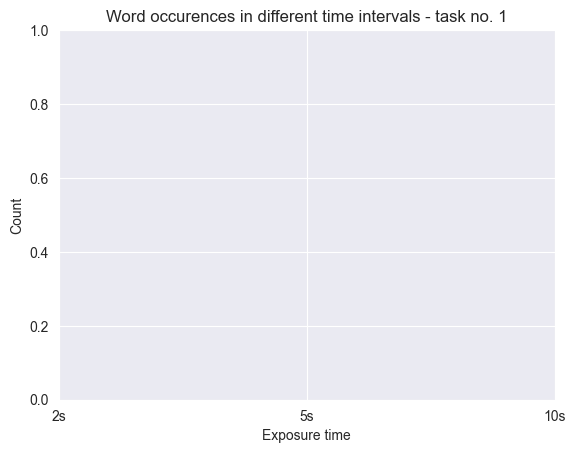

Task 2, word "family", p = 0.022370771856165598
Task 2, word "page", p = 0.030197383422318487
Task 2, word "top", p = 0.011931522535756151


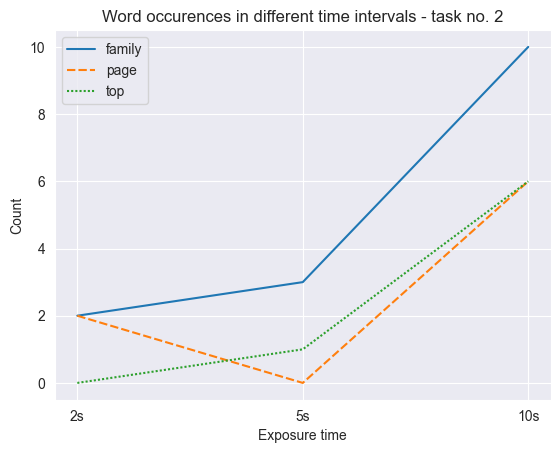

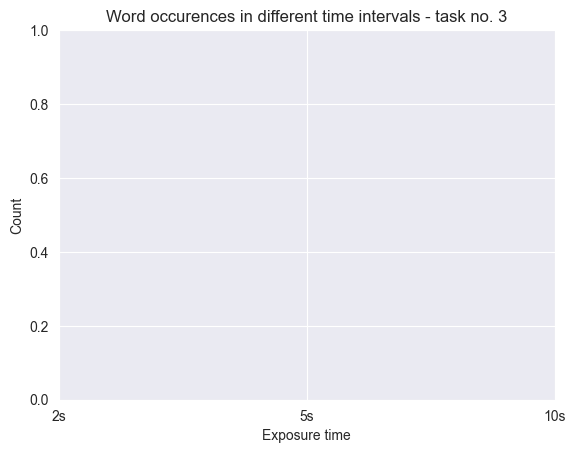

Task 4, word "different", p = 0.030197383422318487


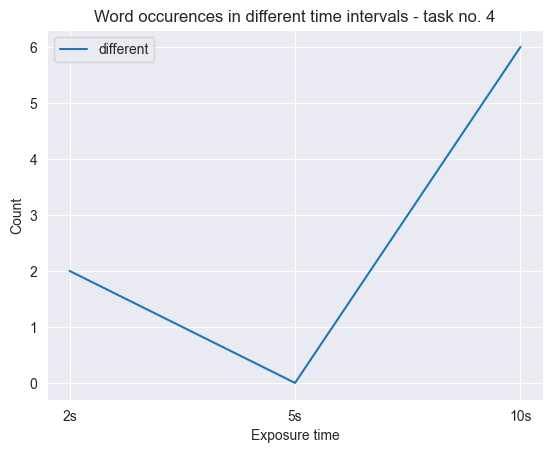

Task 5, word "lot", p = 0.0301973834223185


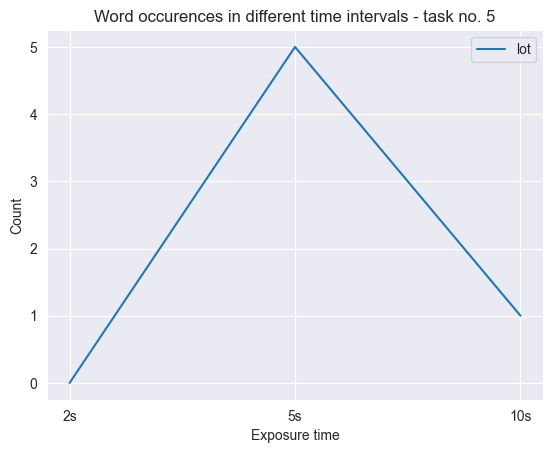

Task 6, word "news", p = 0.019425347946439436


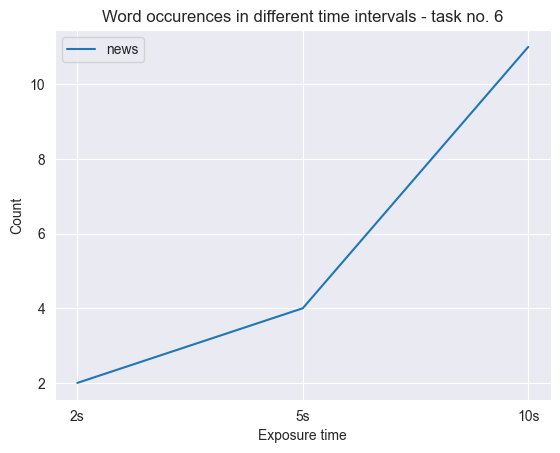










med
Task 1, word "image", p = 0.02472352647033942


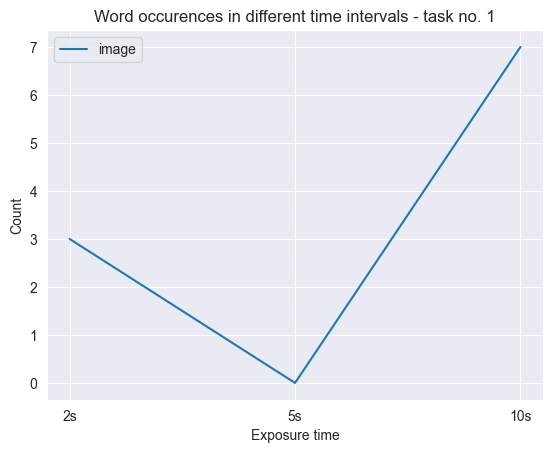

Task 2, word "blue", p = 0.03877420783172202
Task 2, word "website", p = 0.04504920239355782


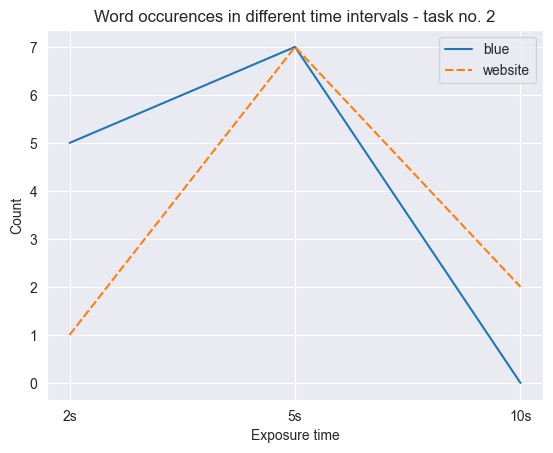

Task 3, word "image", p = 0.0421438435092764
Task 3, word "website", p = 0.004389361842778439
Task 3, word "mountain", p = 0.030197383422318487


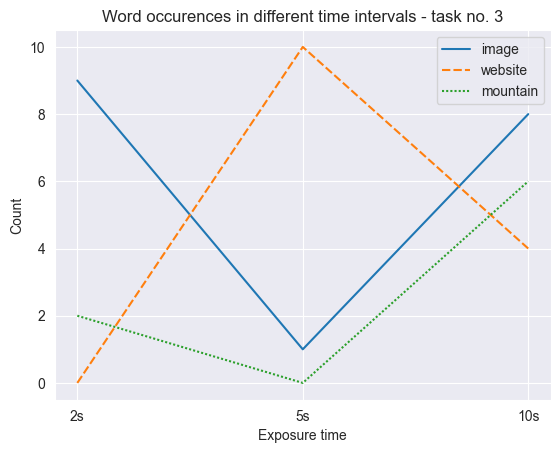

Task 4, word "website", p = 0.007446583070924351


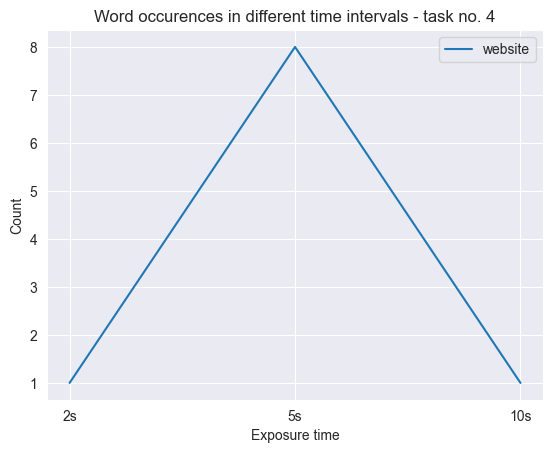

Task 5, word "item", p = 0.011931522535756151


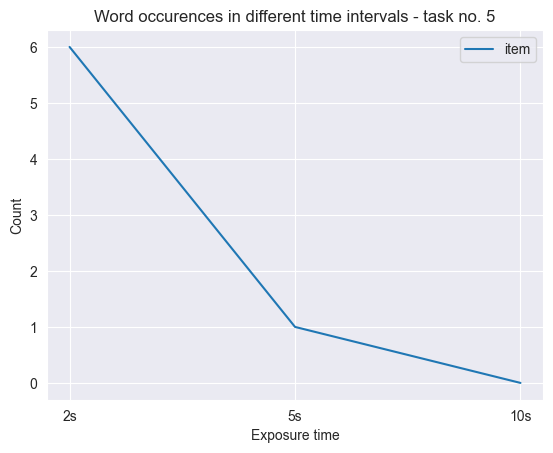

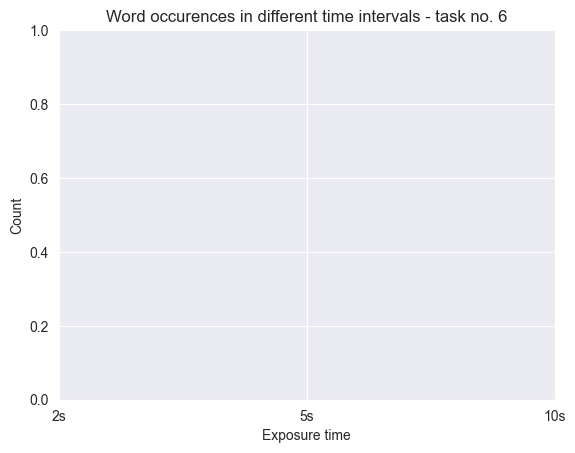










high
Task 1, word "woman", p = 0.04978706836786395
Task 1, word "clothing", p = 0.015503853599009307


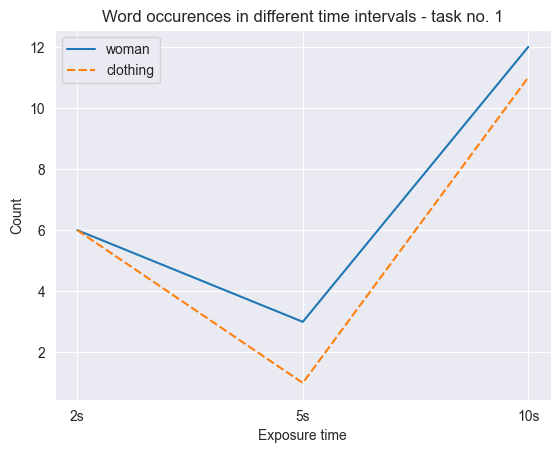

Task 2, word "picture", p = 0.027647076357758687


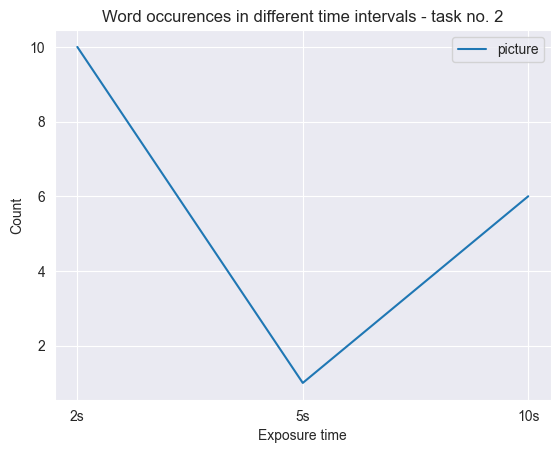

Task 3, word "white", p = 0.030197383422318487


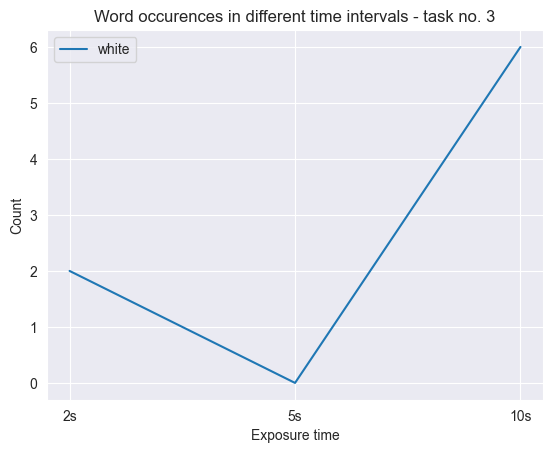

Task 4, word "prague", p = 0.005516564420760776
Task 4, word "showing", p = 0.0301973834223185
Task 4, word "lot", p = 0.006737946999085476


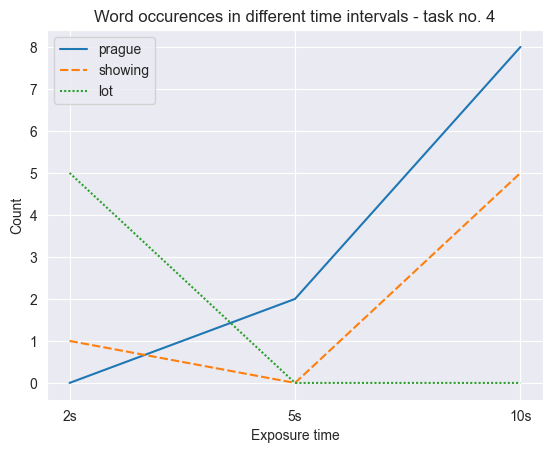

Task 5, word "different", p = 0.02472352647033942


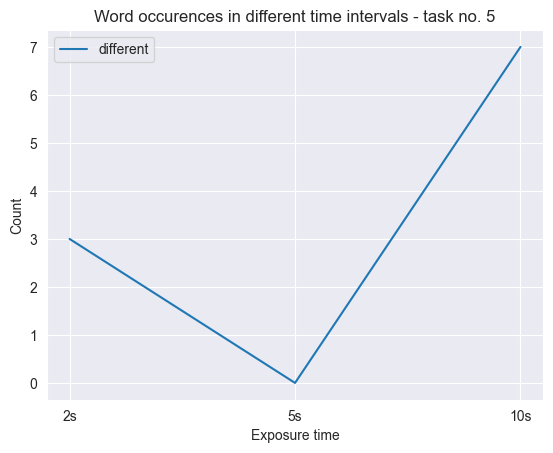

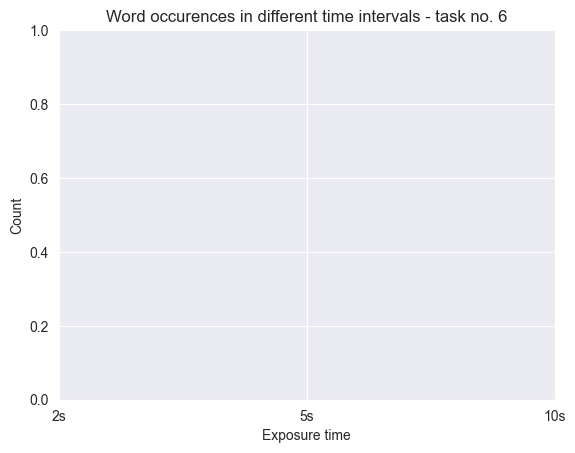

In [77]:
texts = {
    1: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    2: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    3: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    4: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    5: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
    6: {'2s': {'low': '', 'med': '', 'high': ''}, '5s': {'low': '', 'med': '', 'high': ''}, '10s': {'low': '', 'med': '', 'high': ''}},
}

for index, row in data.iterrows():
    texts[row.task][row.interval][row.pst_levels_correct_group] += (row.desc_tokens + ' ') if type(row.desc_tokens) == str else ''

for group in ['low', 'med', 'high']:
    word_differences = {
    1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}
    }
    significant_words = {
        1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}
    }
    print('\n\n\n\n\n\n\n\n\n' + group)
    for task in [1, 2, 3, 4, 5, 6]:
        words = texts[task]['2s'][group] + texts[task]['5s'][group] + texts[task]['10s'][group]
        words_2s = sorted(WordCloud(collocations=False).process_text(texts[task]['2s'][group]).items(),key=lambda item: -item[1])    
        words_5s = sorted(WordCloud(collocations=False).process_text(texts[task]['5s'][group]).items(),key=lambda item: -item[1])    
        words_10s = sorted(WordCloud(collocations=False).process_text(texts[task]['10s'][group]).items(),key=lambda item: -item[1])
        most_common_words = list(map(lambda x: x[0], sorted(WordCloud(collocations=False).process_text(words).items(),key=lambda item: -item[1])[0:15]))
        for word in most_common_words:
            word_differences[task][word] = [
                words_2s[[x[0] for x in words_2s].index(word)][1] if word in [x[0] for x in words_2s] else 0,
                words_5s[[x[0] for x in words_5s].index(word)][1] if word in [x[0] for x in words_5s] else 0,
                words_10s[[x[0] for x in words_10s].index(word)][1] if word in [x[0] for x in words_10s] else 0
            ]
            stat = stats.chisquare(word_differences[task][word])
            if(stat.pvalue < 0.05):
                significant_words[task][word] = word_differences[task][word]
                print('Task ' + str(task) + ', word "' + word + '", p = ' + str(stat.pvalue))
        fig = sns.lineplot(data=significant_words[task])
        fig.set_xticks([0, 1, 2])
        fig.set_xticklabels(['2s','5s','10s'])
        fig.set_title('Word occurences in different time intervals - task no. ' + str(task))
        fig.set_xlabel('Exposure time')
        fig.set_ylabel('Count')
        plt.show()